#  Machine Learning project (2021-2022)

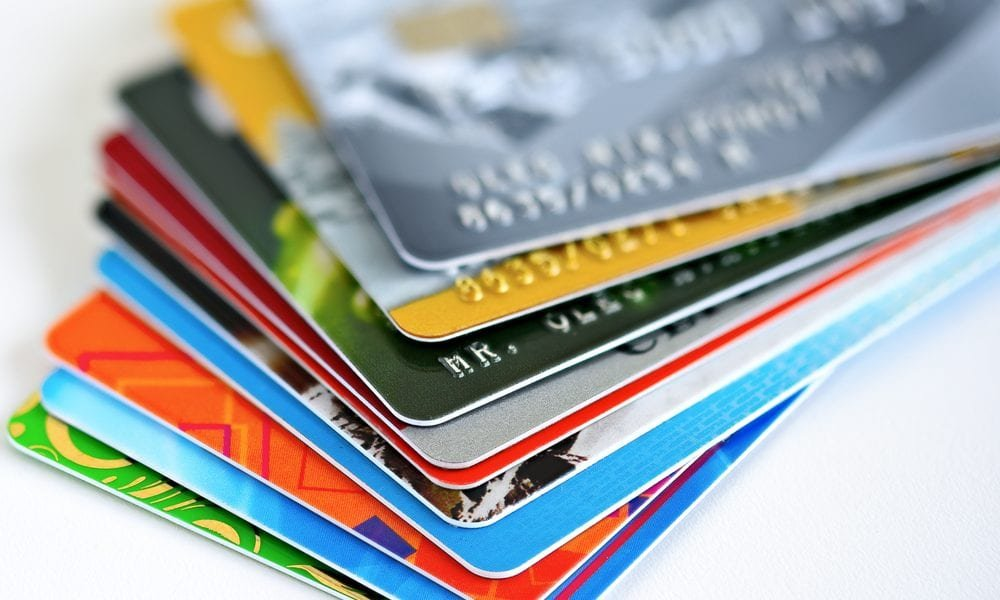

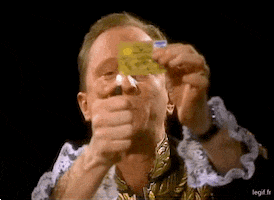

## About the Data

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-2: No consumption
 -1: Paid in full
 0: The use of revolving credit
1 = payment delay for one month
2 = payment delay for two months
 . . .
8 = payment delay for eight months;
9 = payment delay for nine months and above.
)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

## packages

In [1]:
!pip install catboost
!pip install xgboost
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import Pool
 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import svm
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import time


## Load Data

In [2]:
#display the 5 first rows
df=pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

# Understand the Data

In [3]:
#get information about the data (how many non null value , the type of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# our data it's about numbers so we implement this command to get some informations about our columns
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
# to know how many NaN value in our Data
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# to know how many rows and columns we have
df.shape

(30000, 25)

## DEFAULT

In [8]:
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)

In [9]:
df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

the paper said that they have 25000 clear row but we have 30000 so we have 5000 dirty data 
5529 observations (22.12%) are the cardholders with default payment. so we have 1107 dirty data with value 1
and we have 3893 dirty data with 0 

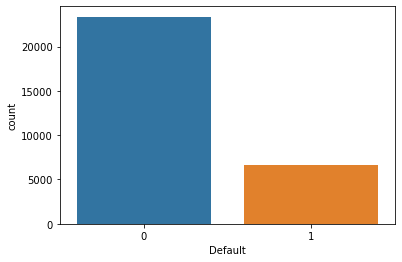

In [10]:
sns.countplot(x='Default', data=df)
plt.show()

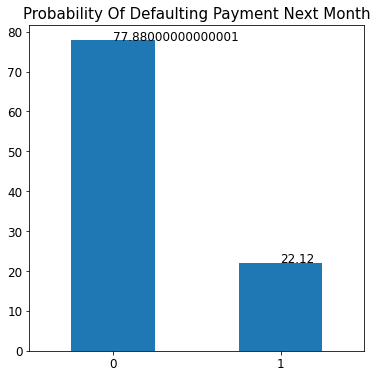

In [11]:
def_cnt = (df.Default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

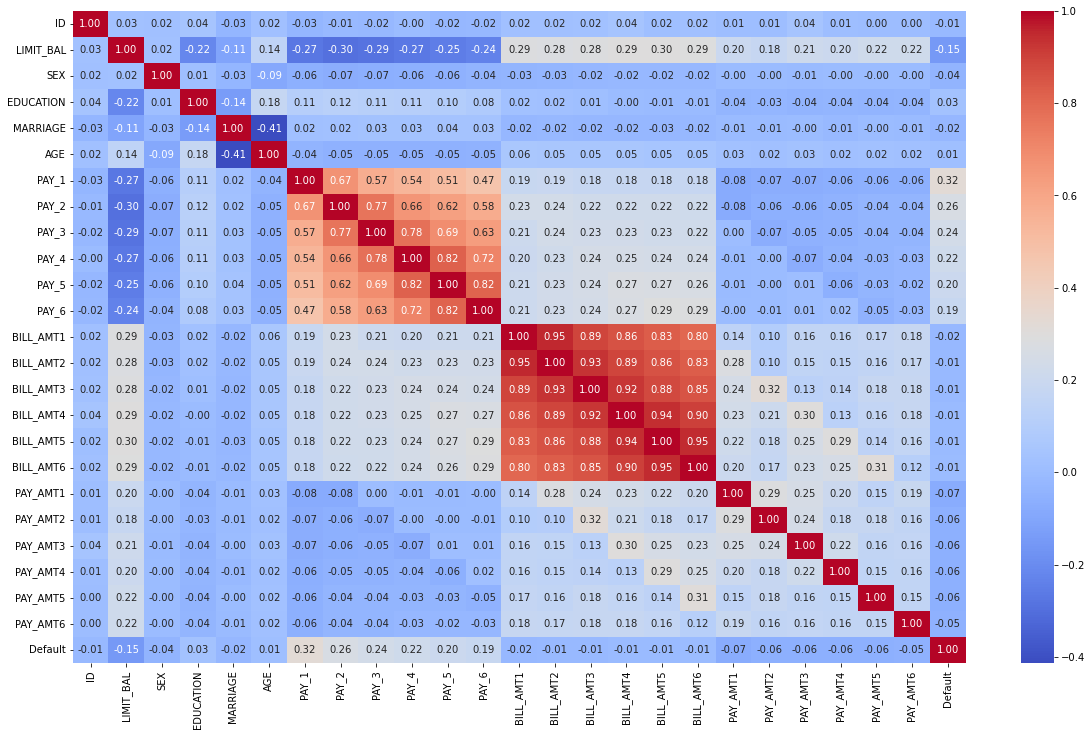

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

## AGE

C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


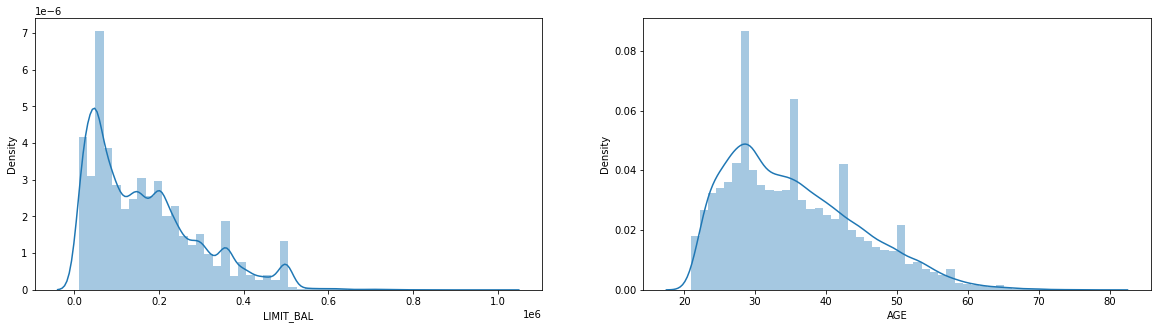

In [13]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

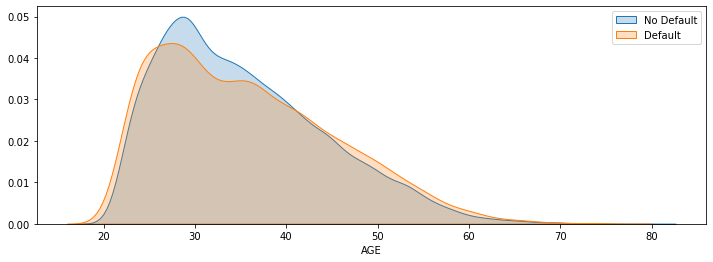

In [14]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

In [15]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [16]:
df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)


AgeBin    Default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: Default, dtype: float64

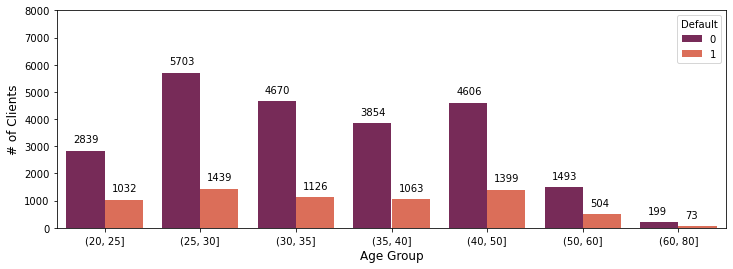

In [17]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

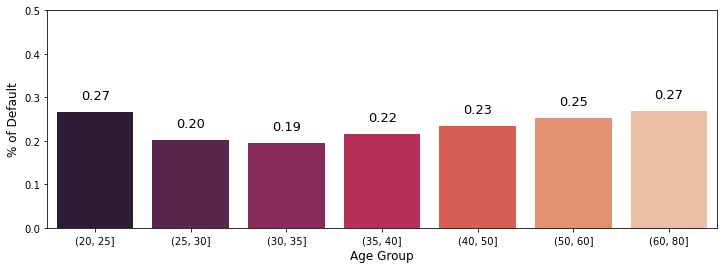

In [18]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "Default", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, the lowest chances of default are registered around 30-35 years old, while the highest occur at the extremes (20-25 and 60+).



## MARRIAGE

In [19]:
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)


MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: Default, dtype: float64

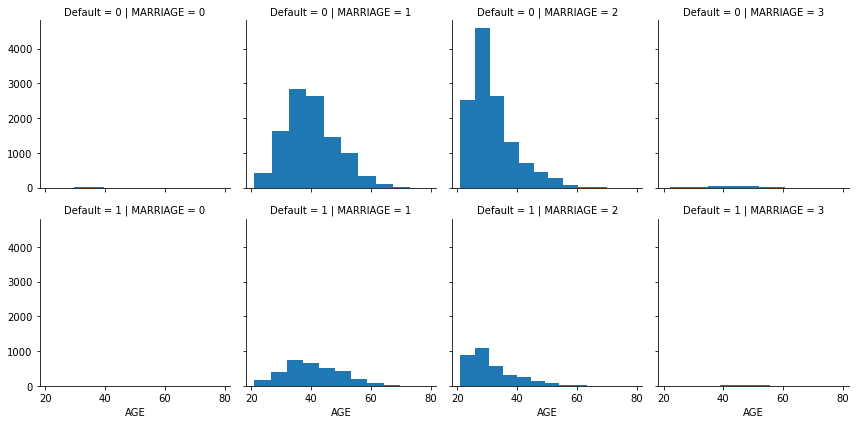

In [21]:
g = sns.FacetGrid(df, row='Default', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

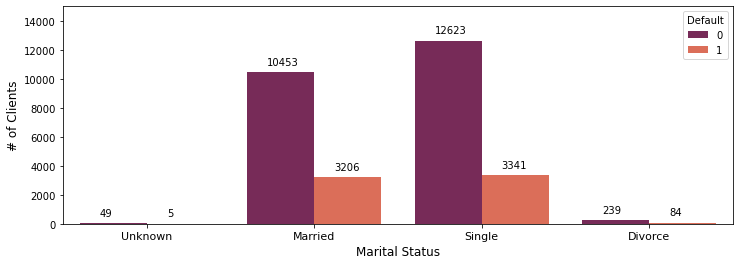

In [22]:

plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

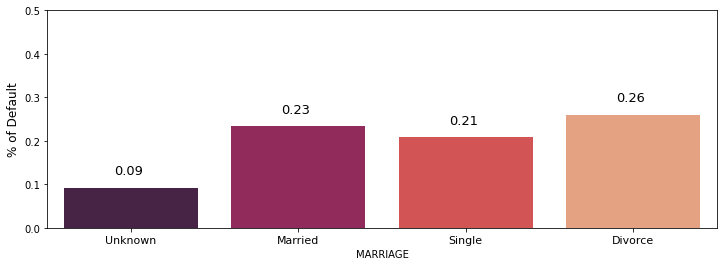

In [23]:

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, most people fall either on the 'Married' or 'Single' category.

Once again, the 'Unknown' category present a lower probability of default. Among the rest, those who are single have a slight lower chance of default, while the people who got divorced are more likely to default.

## SEX

In [24]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

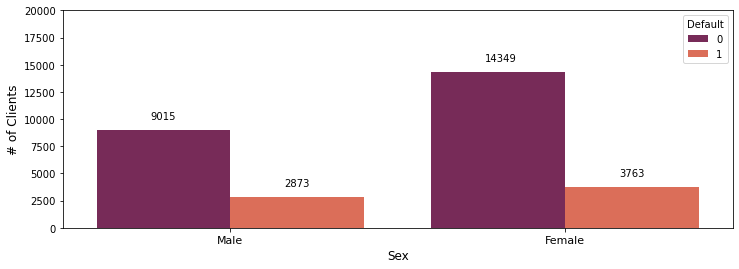

In [25]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

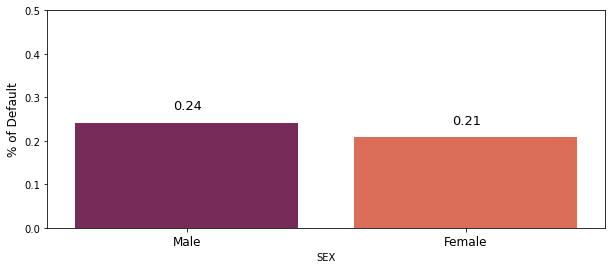

In [26]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. We will try to confirm it a little later by comparing men and women with the same education and marital status.



## EDUCATION

As we saw on the descriptive statistics (df.describe), there is a minimum value of 0 in 'Education', which didn't match the possible values for this feature according to the original dataset information. The additional information puts 4 values (0, 4, 5, 6) in the same category ('others').

The values '5' and '6' are both originally labelled as 'unknown' and we don't have a defined label for '0'. Maybe we can put them all together in the same category. But first, we will leave it as it is for now and check how many samples there are in each category and what is their percentage of Default.

In [27]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)


EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: Default, dtype: float64

In [29]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [30]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

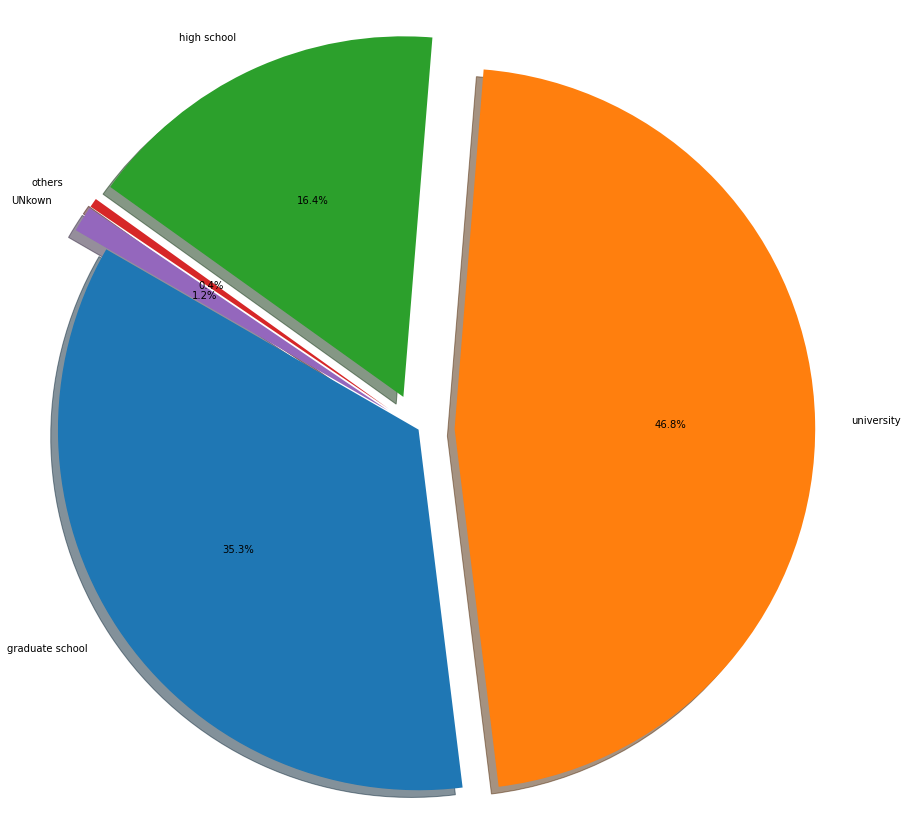

In [31]:
counts_left=[10585,14030,4917,123,345]
department_left=['graduate school','university','high school','others','UNkown']
explode=[0,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(counts_left, explode=explode,labels=department_left, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  
plt.show()

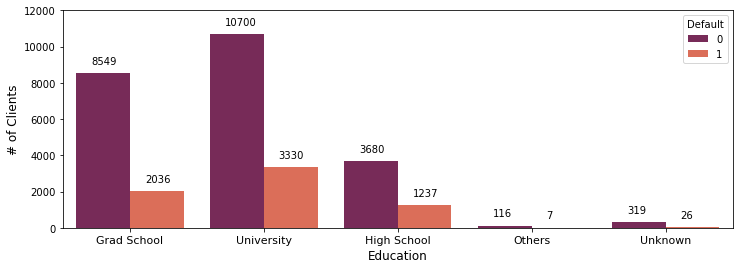

In [32]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

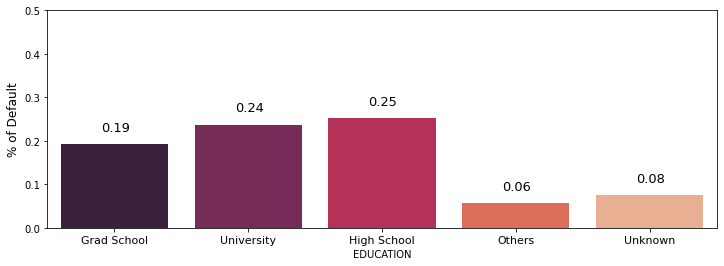

In [33]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

The predominant level of education in our dataset is 'University', followed by 'Grad School', 'High School', 'Unknown' and 'Others'.

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability.

## Sex + Education/Marital Status


In [34]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)


MARRIAGE  SEX  Default
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: Default, dtype: float64

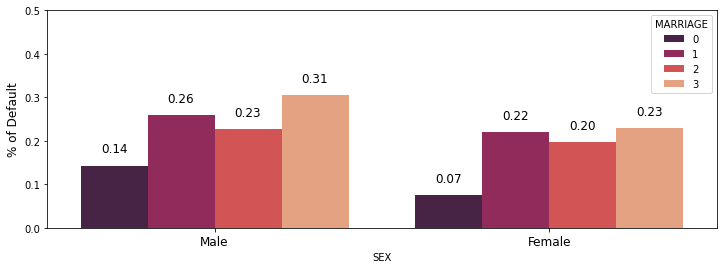

In [35]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [36]:
df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)


EDUCATION  SEX  Default
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.904762
                1          0.095238
           2    0          0.962963
                1          0.037037
5          1    0          0.921875
                1          0.078125
           2    0          0.926267
                1          0.073733
Name: Default, dtype: float64

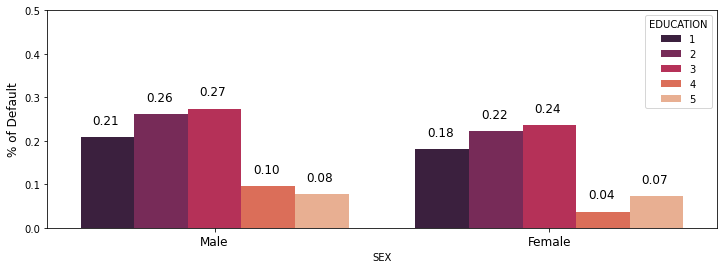

In [37]:

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

In every single comparison, the probability of default was higher for men.



## Amount of Given Credit (LIMIT_BAL)


C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


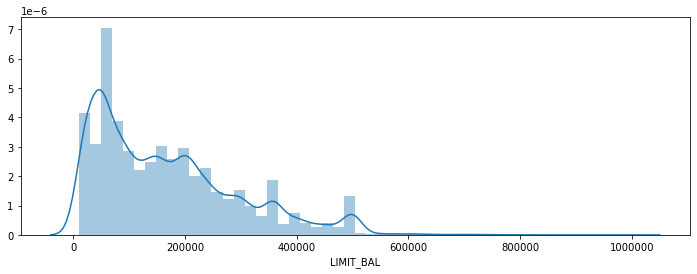

In [38]:
plt.figure(figsize=(12,4))

sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

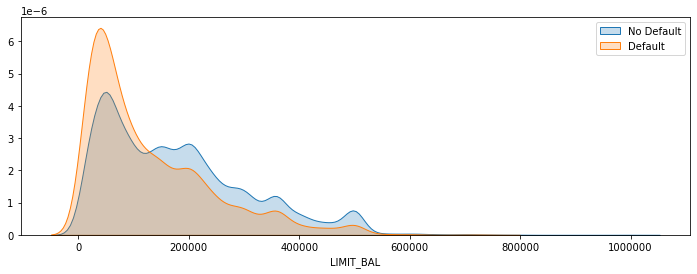

In [39]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

In [40]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


In [41]:
df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: Default, dtype: float64

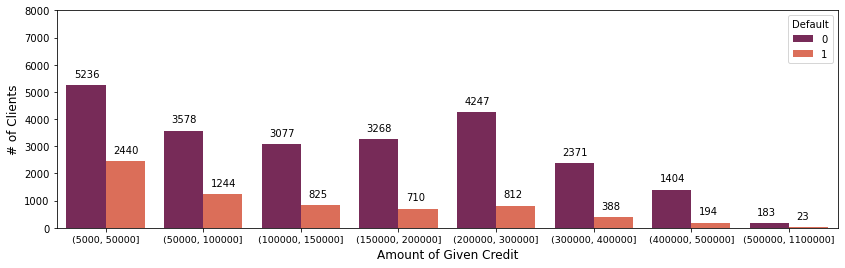

In [42]:
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="Default", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

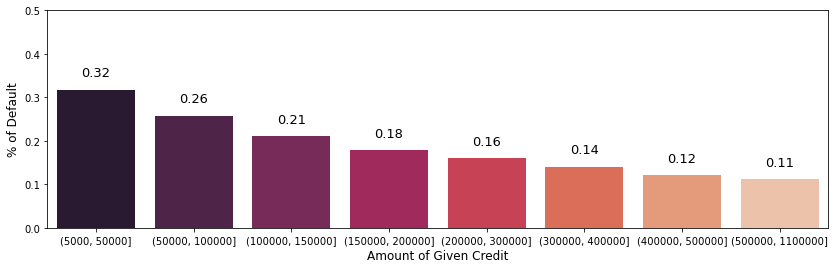

In [43]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "Default", data = df, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Now it's pretty clear that there is a significant rate of default (over 30%) from customers with 50k or less of credit limit. We also can see that the higher the limit, the lower is the chance of defaulting.

## Amount of Given Credit (LIMIT_BAL) + Demographic Features

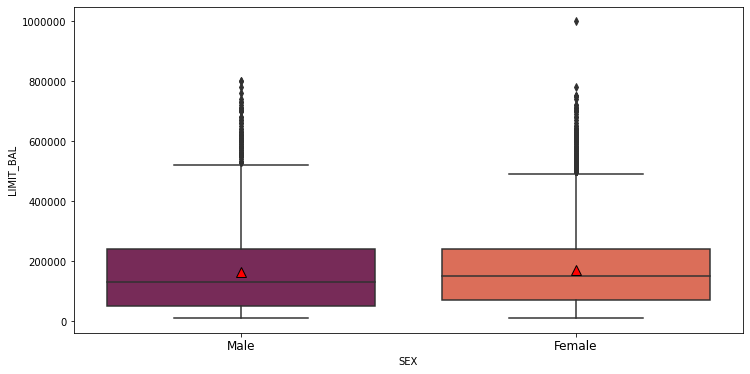

In [44]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [45]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

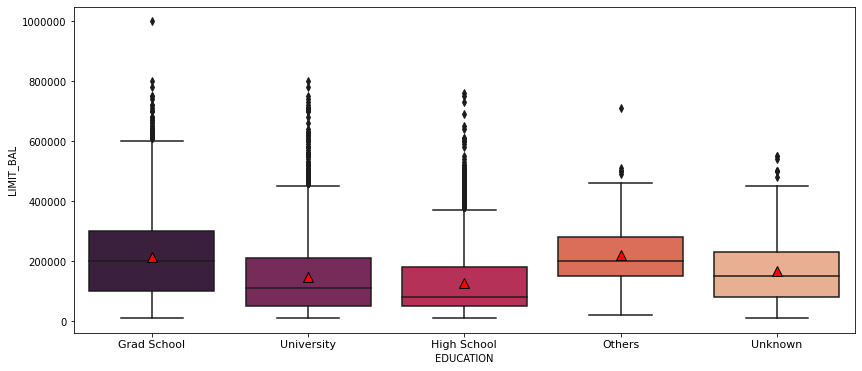

In [46]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

In [47]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()


MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

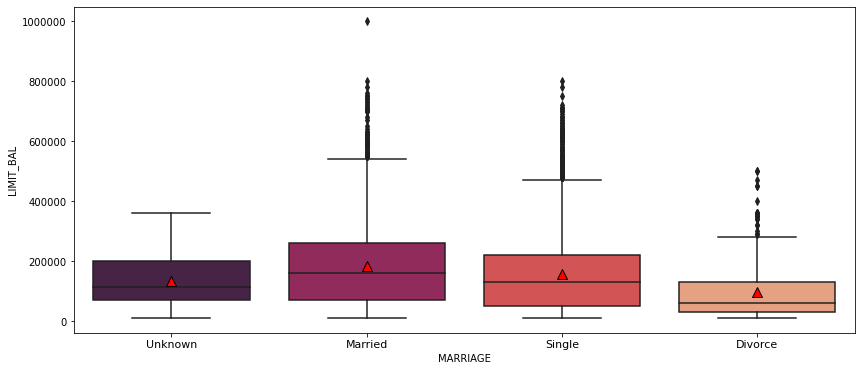

In [48]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

In [49]:
df.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

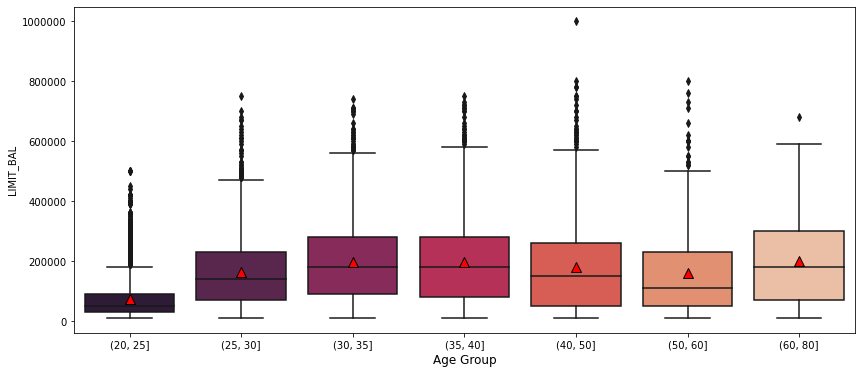

In [50]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()


Overall, the offered credit limit seems to match the ability to pay in time within each category. The exceptions are the unknown categories, which have lower chances of default, but do not lead in the amount of given credit, and the age group of 60+, which, despite having one of the highest chances of default, receives, on average, the highest credit value.by age group.

We could analyze the relationship between the credit limit and the combination of two demographic features to see if we can find something different. In this notebook, I’ll only plot the ‘sex’ feature combined with the remaining demographic features.

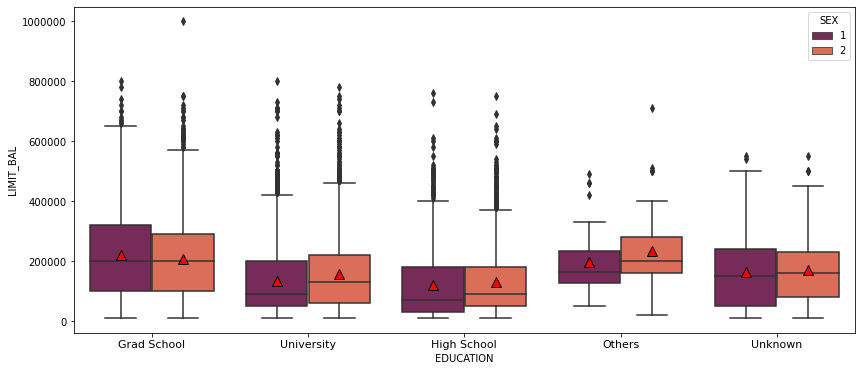

In [51]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

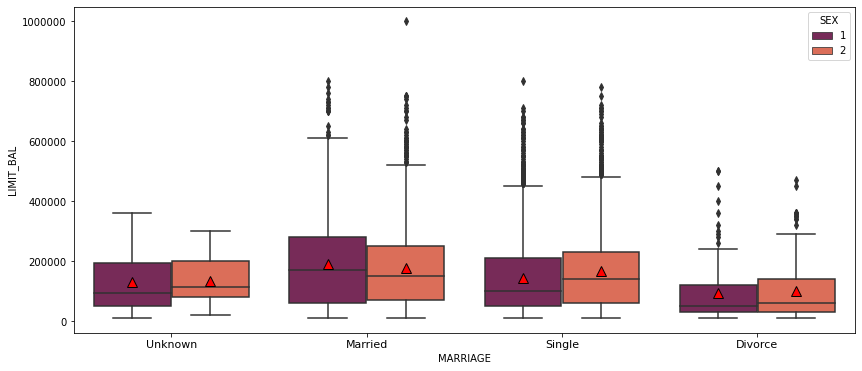

In [52]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

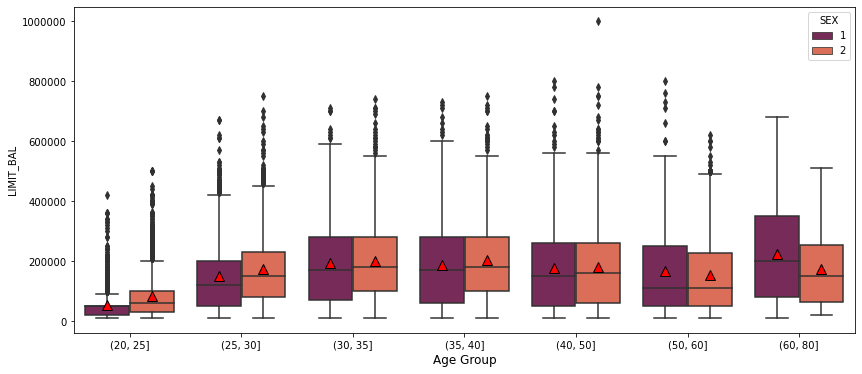

In [53]:

plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

We saw earlier that the average given credit for women was slightly higher than for men. That still holds up for several combinations of categories, except among customers that:

Have a grad school diploma;
Are married;
Are 50+ years old.

## Repayment Status (PAY_X)


C:\Users\houss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houss\anaconda3\lib\si

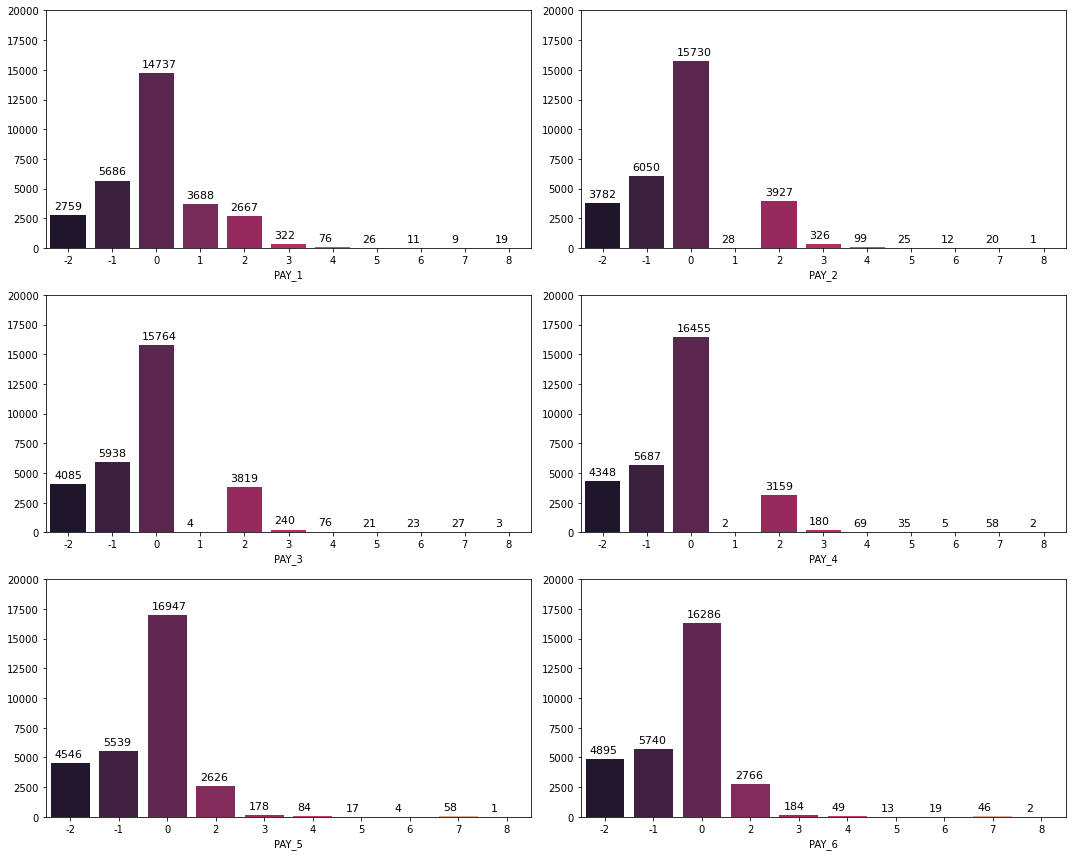

In [54]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

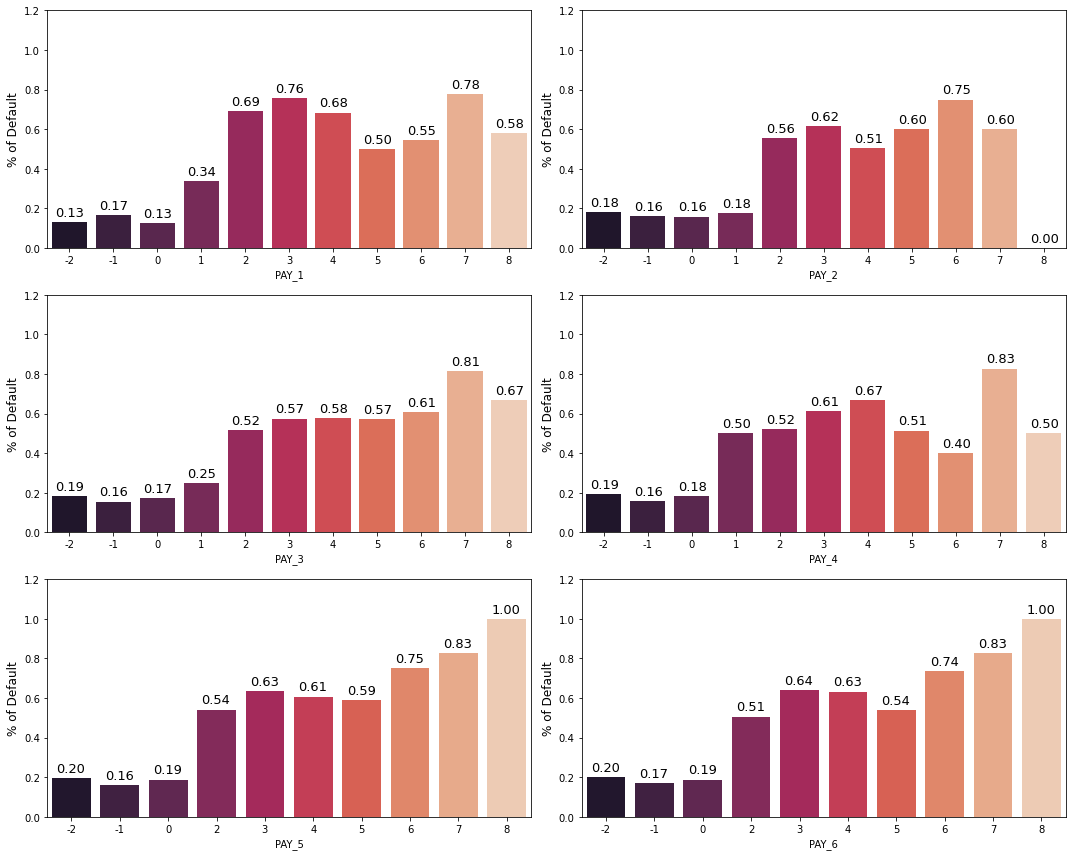

In [55]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Most customers are duly paying their credit card bills. And it's pretty clear that their likelihood of default are much lower than the rest.

Since there are only a few customers with 4+ months of delay in all PAY_X features, we could make a new analysis with them all together just to have the average default of a more significant group.

In [56]:
df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

In [57]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

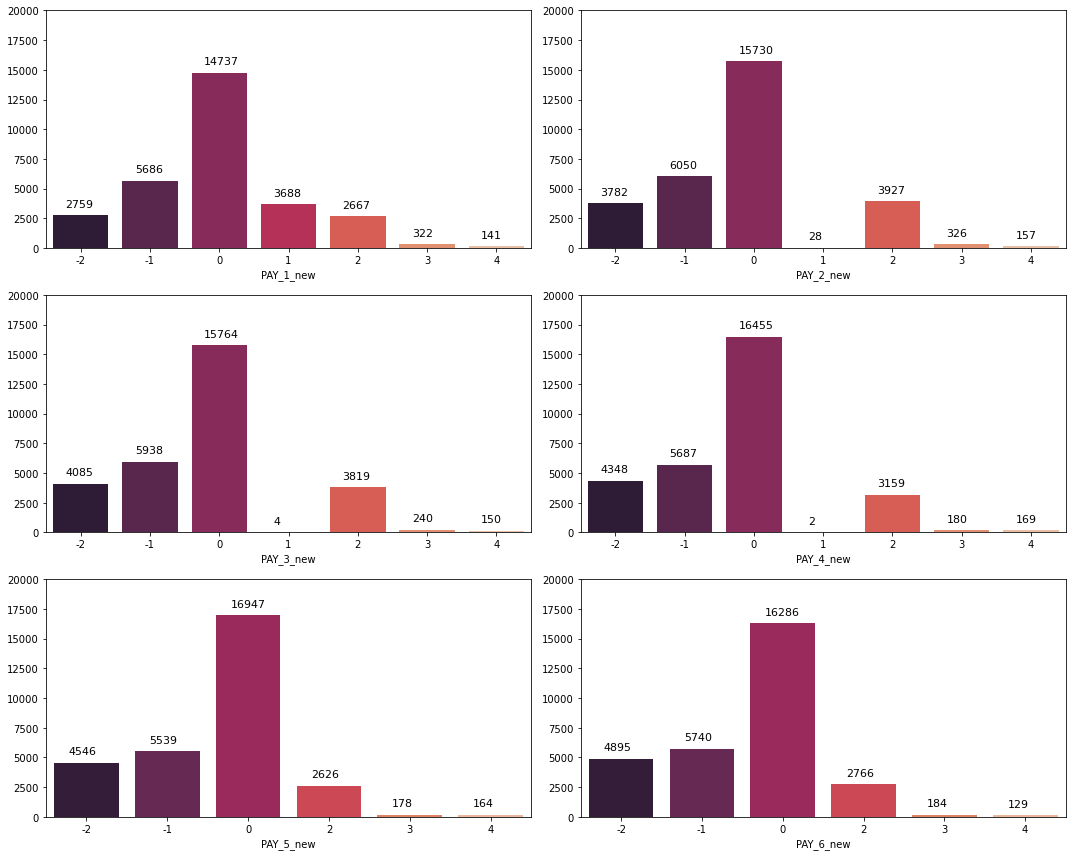

In [58]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

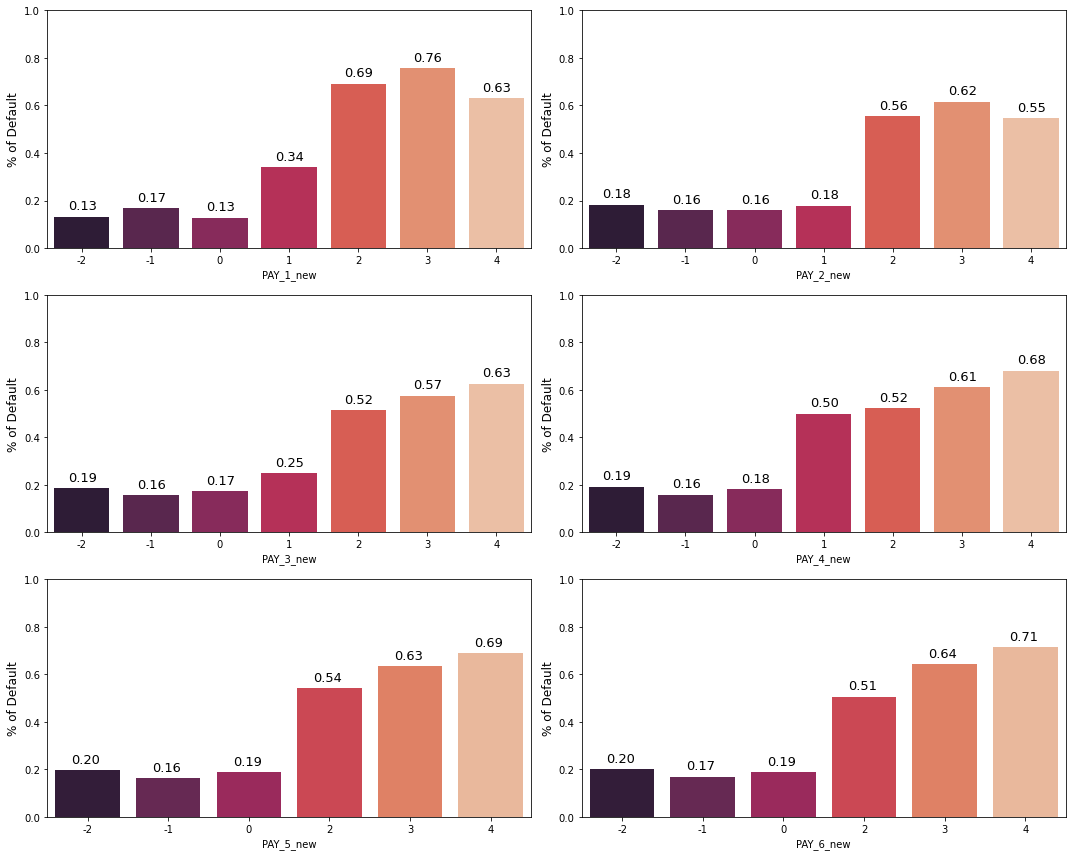

In [59]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

plt.show()

## Amount of Bill Statement (BILL_AMTX)

C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

KeyboardInterrupt: 

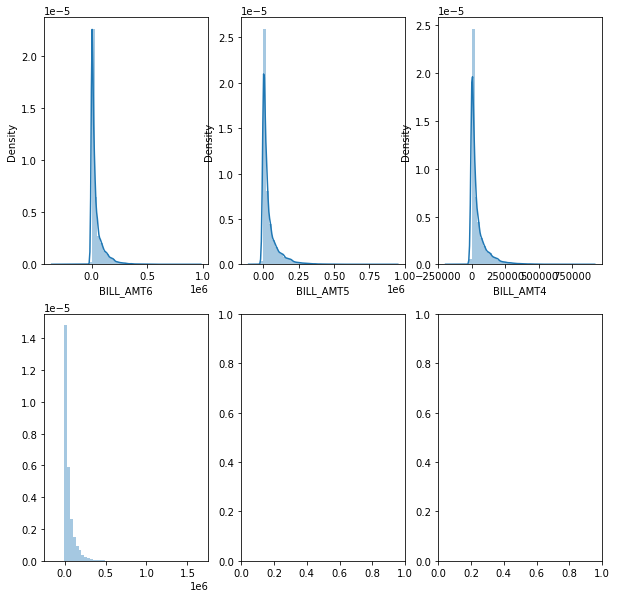

In [60]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['BILL_AMT6'], ax = ax[0,0]) 
sns.distplot(df['BILL_AMT5'], ax = ax[0,1]) 
sns.distplot(df['BILL_AMT4'], ax = ax[0,2]) 
sns.distplot(df['BILL_AMT3'], ax = ax[1,0]) 
sns.distplot(df['BILL_AMT2'], ax = ax[1,1]) 
sns.distplot(df['BILL_AMT1'], ax = ax[1,2])
 
plt.show()

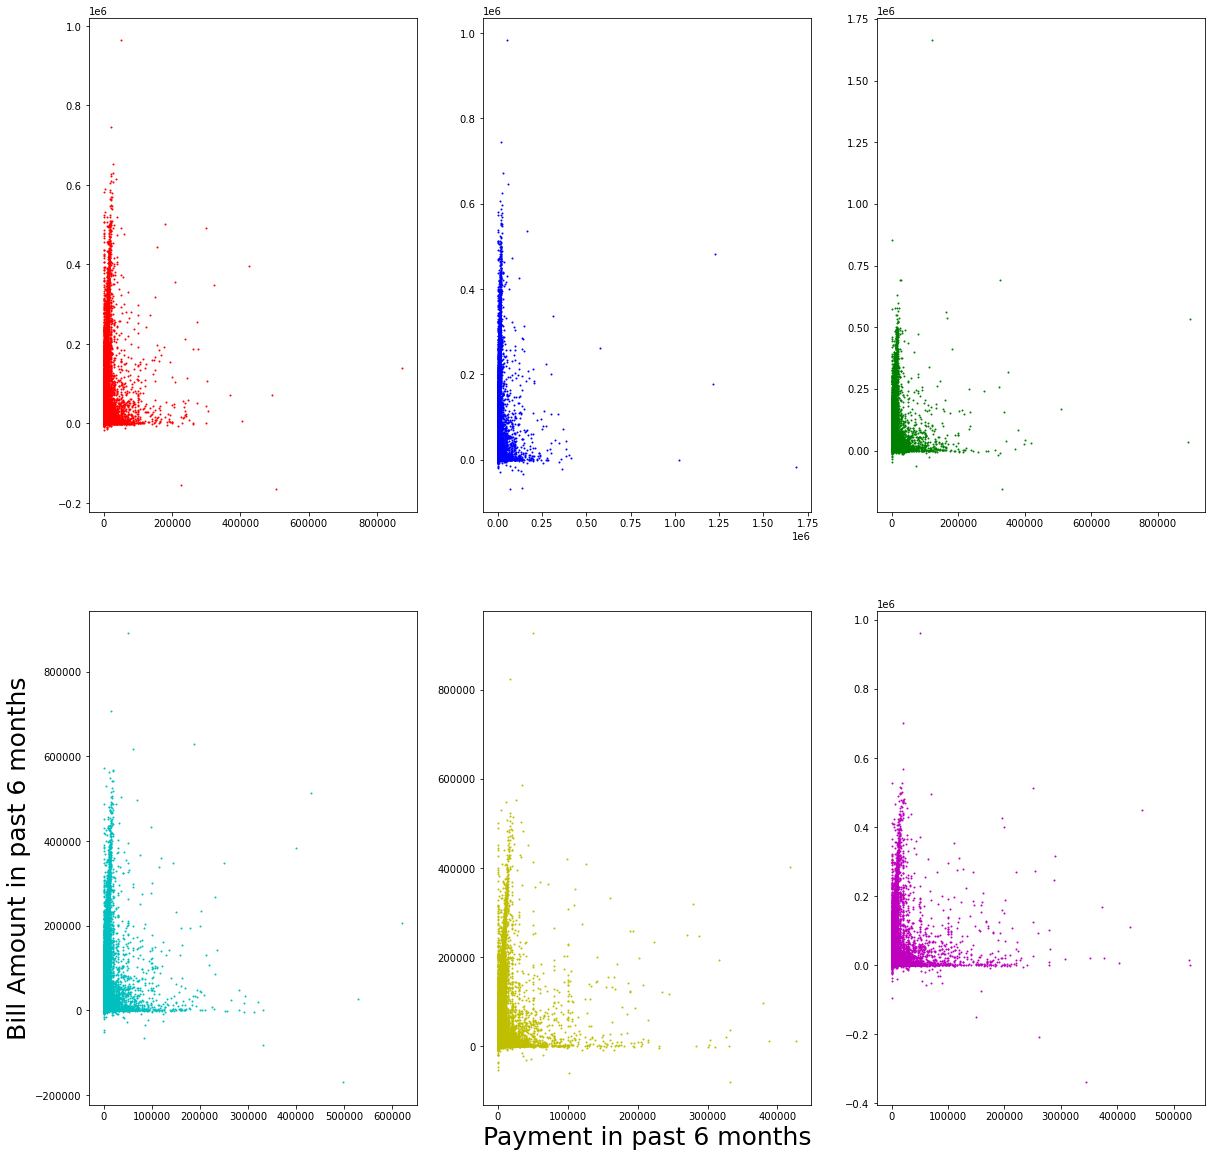

In [61]:
plt.subplots(figsize=(20,20))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

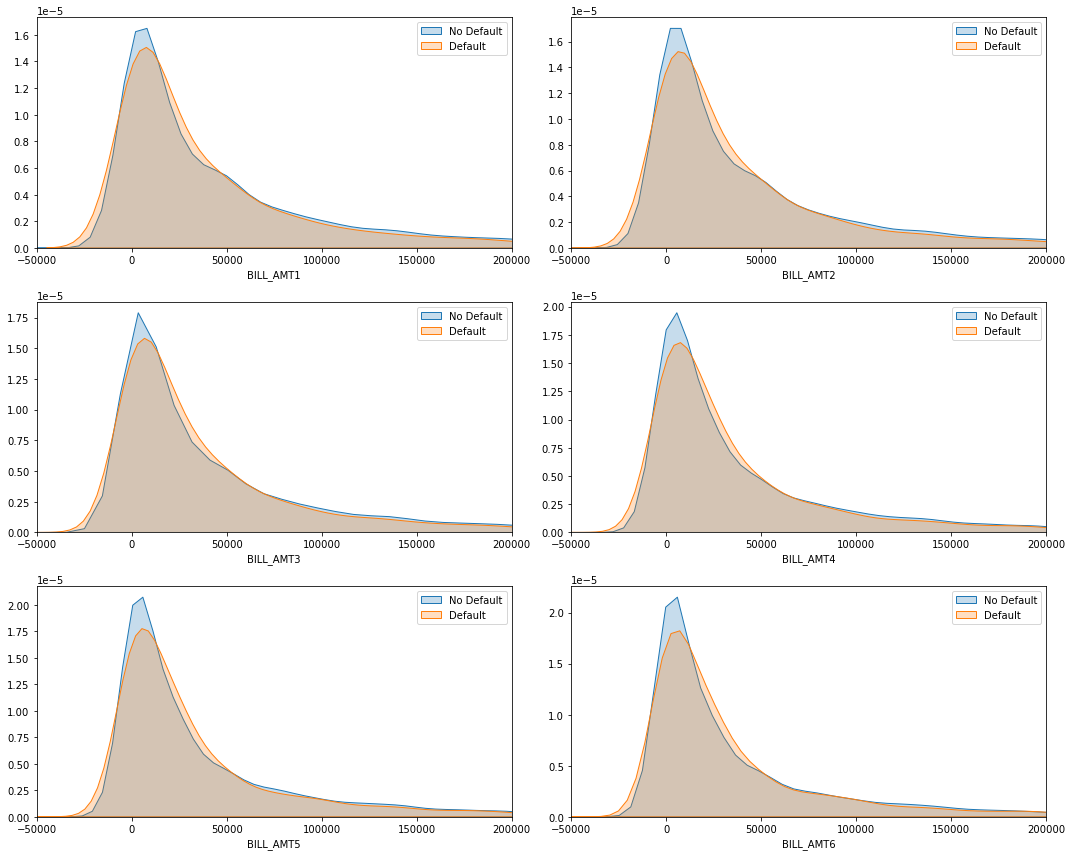

In [62]:

bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [63]:
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [64]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

In [65]:
for col in bill_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

BILL_AMT1_bin      Default
(-350000, -1]      0          0.815254
                   1          0.184746
(-1, 0]            0          0.734064
                   1          0.265936
(0, 25000]         0          0.774470
                   1          0.225530
(25000, 75000]     0          0.775209
                   1          0.224791
(75000, 200000]    0          0.802396
                   1          0.197604
(200000, 2000000]  0          0.797111
                   1          0.202889
Name: Default, dtype: float64
BILL_AMT2_bin      Default
(-350000, -1]      0          0.810164
                   1          0.189836
(-1, 0]            0          0.753791
                   1          0.246209
(0, 25000]         0          0.775836
                   1          0.224164
(25000, 75000]     0          0.773531
                   1          0.226469
(75000, 200000]    0          0.799176
                   1          0.200824
(200000, 2000000]  0          0.790230
                   

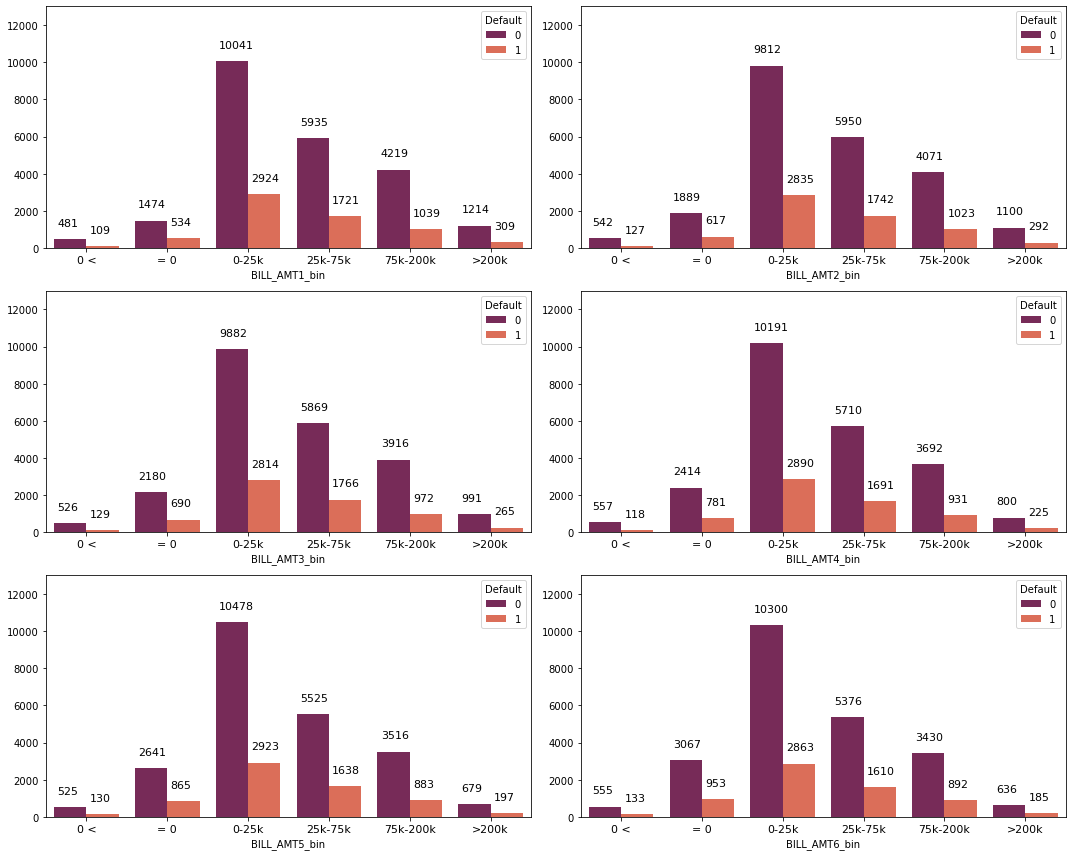

In [66]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

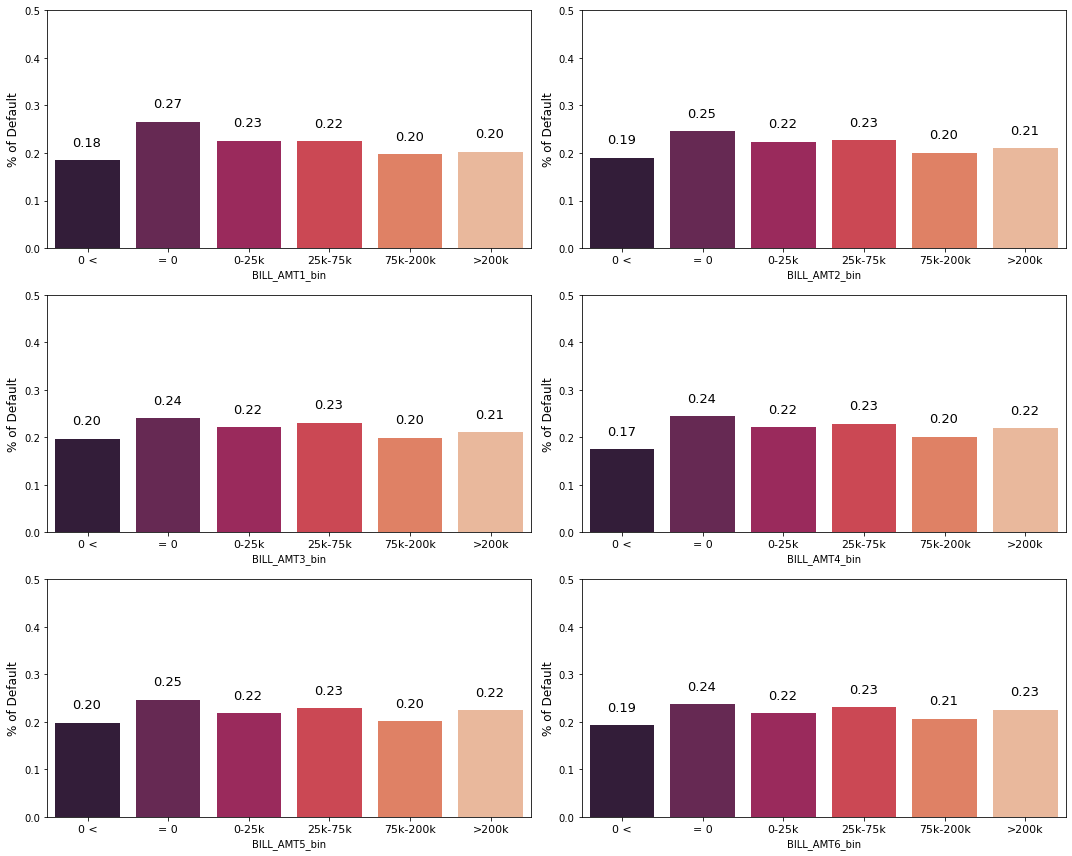

In [67]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

As expected, those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

## Amount of Previous Payment (PAY_AMTX)

C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\houss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

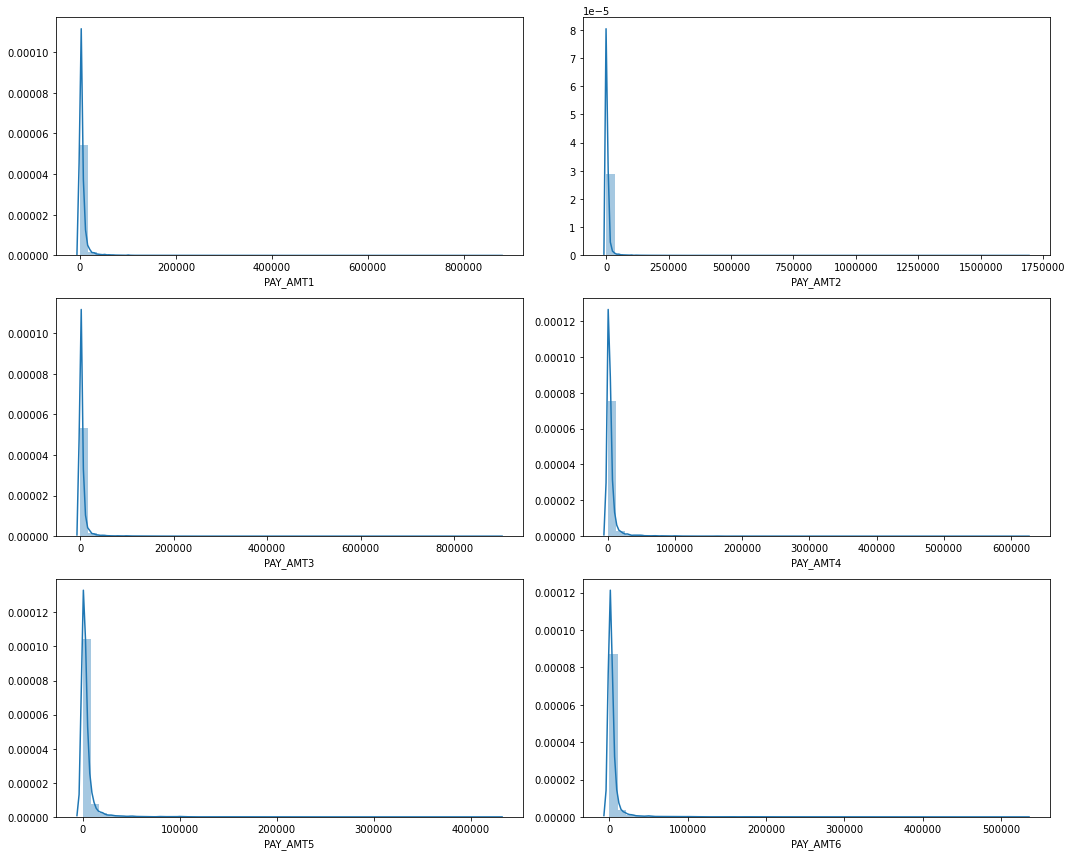

In [68]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

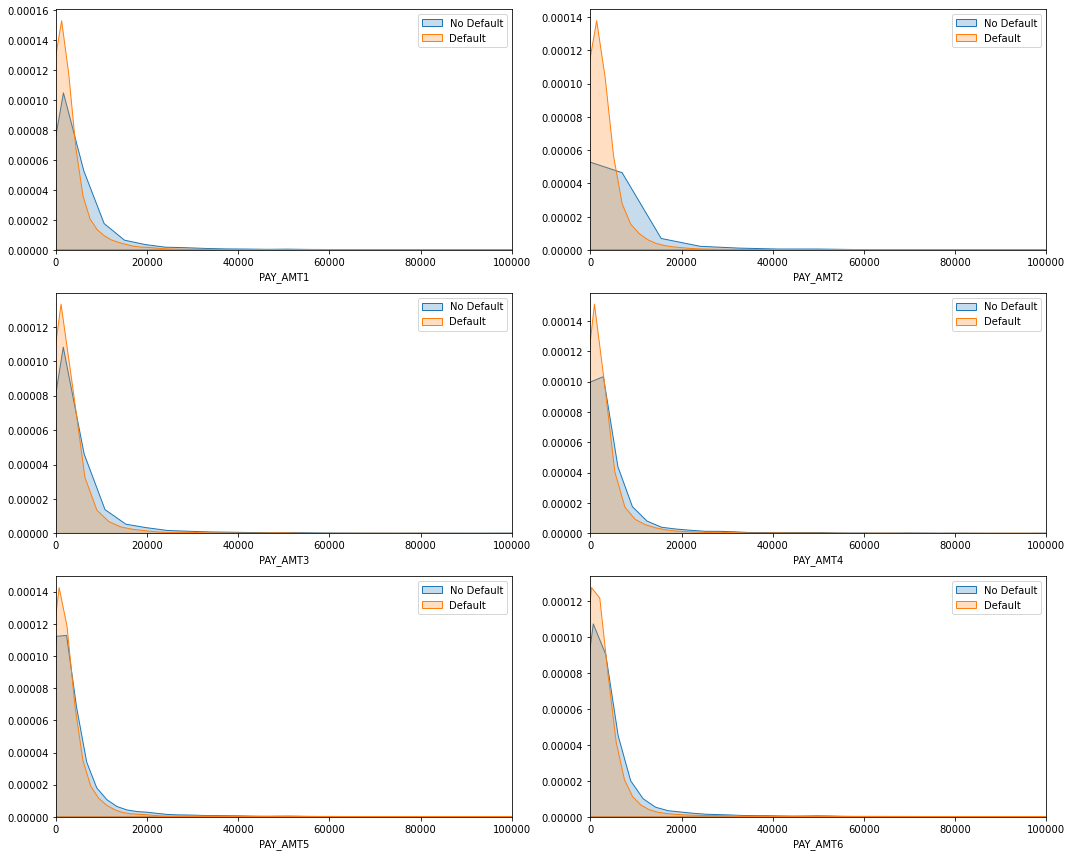

In [69]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [70]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [71]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

In [72]:
for col in pay_amtx_bins:
    print(df['Default'].groupby(df[col]).value_counts(normalize = True))

PAY_AMT1_bin       Default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: Default, dtype: float64
PAY_AMT2_bin       Default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: Default, dtype: float64
PAY_AMT3_bin       Default
(-1, 0]            0          0.676441
                   1          0.323559
(

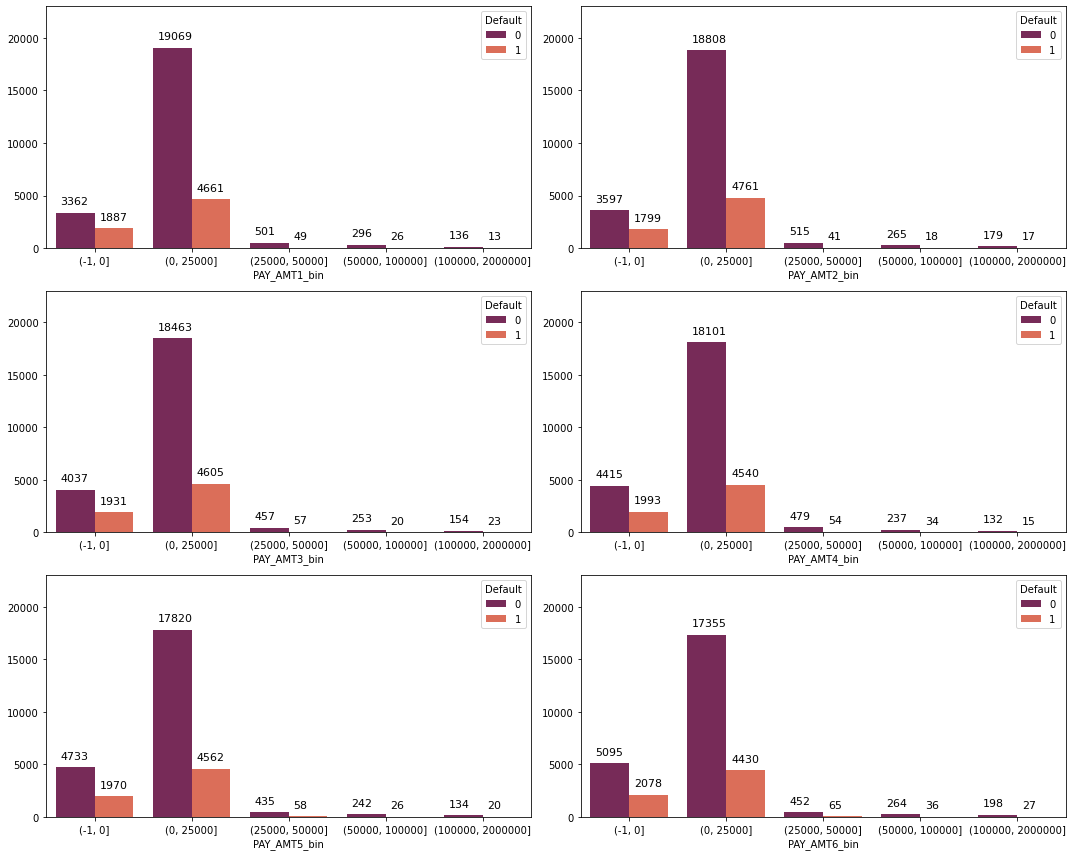

In [73]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

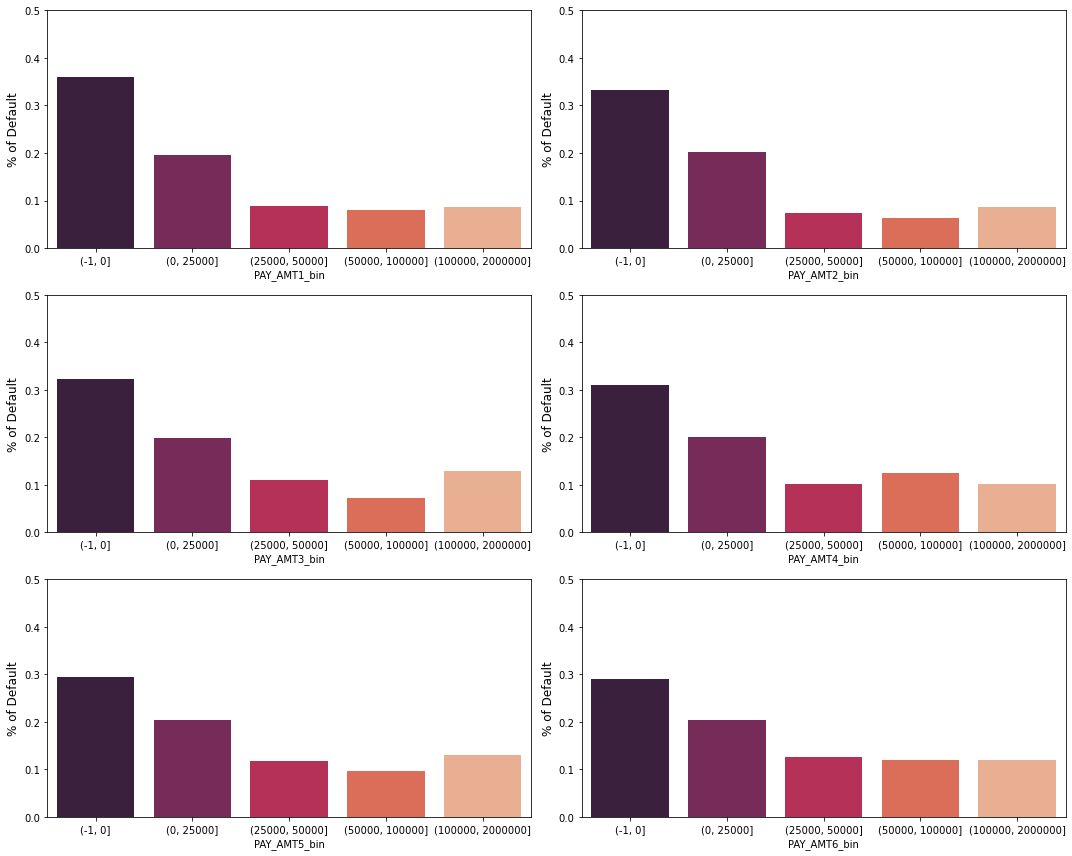

In [74]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  float64 
 2   SEX            30000 non-null  int64   
 3   EDUCATION      30000 non-null  int64   
 4   MARRIAGE       30000 non-null  int64   
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  int64   
 7   PAY_2          30000 non-null  int64   
 8   PAY_3          30000 non-null  int64   
 9   PAY_4          30000 non-null  int64   
 10  PAY_5          30000 non-null  int64   
 11  PAY_6          30000 non-null  int64   
 12  BILL_AMT1      30000 non-null  float64 
 13  BILL_AMT2      30000 non-null  float64 
 14  BILL_AMT3      30000 non-null  float64 
 15  BILL_AMT4      30000 non-null  float64 
 16  BILL_AMT5      30000 non-null  float64 
 17  BILL_AMT6      30000 non-null  

# Modeling

In [79]:
df.shape

(30000, 45)

In [80]:
X = df.copy().drop('Default', axis = 1)
Y = df['Default']

In [81]:
X_base = X.copy().drop(pay_x_new, axis = 1)
X_base = X_base.drop(bill_amtx_bins, axis = 1)
X_base = X_base.drop(pay_amtx_bins, axis = 1)
X_base = X_base.drop(['AgeBin', 'LimitBin'], axis = 1)
X_base.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0       0.0  
1    1000.0    1000.0       0.0    2000.0  
2    1000.0    1000.0    1000.0    5000.0  
3    1200.0    1100.0    1069.0    1000.0  
4   10000.0    9000.0     689.0     679.0  

[5 rows x 24 columns]

### SPLIT DATA

In [82]:
X_base_train, X_base_test, Y_train, Y_test = train_test_split(X_base, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

## k-Nearest Neighbors (les méthodes non ensemblistes) 


## <font color=red>RandomizedSearchCV </font>



In [83]:
from sklearn.model_selection import RandomizedSearchCV
K_range=list(range(1,31))
weight_option=['uniform','distance']
metric_distance=['euclidean','manhattan','minkowski']
param_grid=dict(n_neighbors=K_range,weights=weight_option,metric=metric_distance)

In [84]:
rand=RandomizedSearchCV(KNeighborsClassifier(),param_grid,cv=5)
rand.fit(X_base_train,Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']})

In [85]:
print(rand.best_score_)
print(rand.best_params_)

0.779625
{'weights': 'uniform', 'n_neighbors': 28, 'metric': 'minkowski'}


In [86]:
Final_model_new=rand.best_estimator_
Final_model_new.fit(X_base_train,Y_train)
Final_model_new.score(X_base_test,Y_test)

0.7765

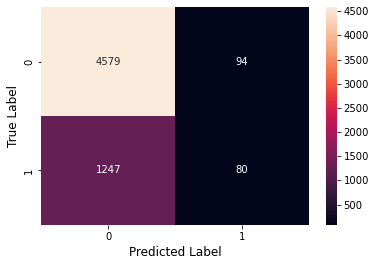

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred=Final_model_new.predict(X_base_test)
rf_confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()




In [88]:
print(metrics.classification_report(Y_test,y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4673
           1       0.46      0.06      0.11      1327

    accuracy                           0.78      6000
   macro avg       0.62      0.52      0.49      6000
weighted avg       0.71      0.78      0.70      6000



ROC_AUC:  0.6529851859461051


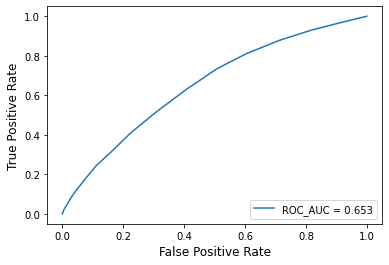

In [89]:
rf_pred_proba =Final_model_new.predict_proba(X_base_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Decision Tree (les méthodes non ensemblistes) 


## <font color=red>GridSearchCV </font>



In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}
grid=GridSearchCV(DecisionTreeClassifier(random_state=3),param_grid,cv=5)
grid.fit(X_base_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [91]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.8207916666666666


In [92]:
final_model=grid.best_estimator_
final_model.fit(X_base_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

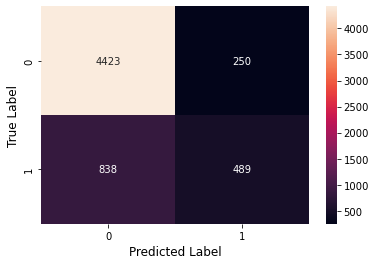

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred=final_model.predict(X_base_test)
rf_confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [94]:
print(metrics.classification_report(Y_test,y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



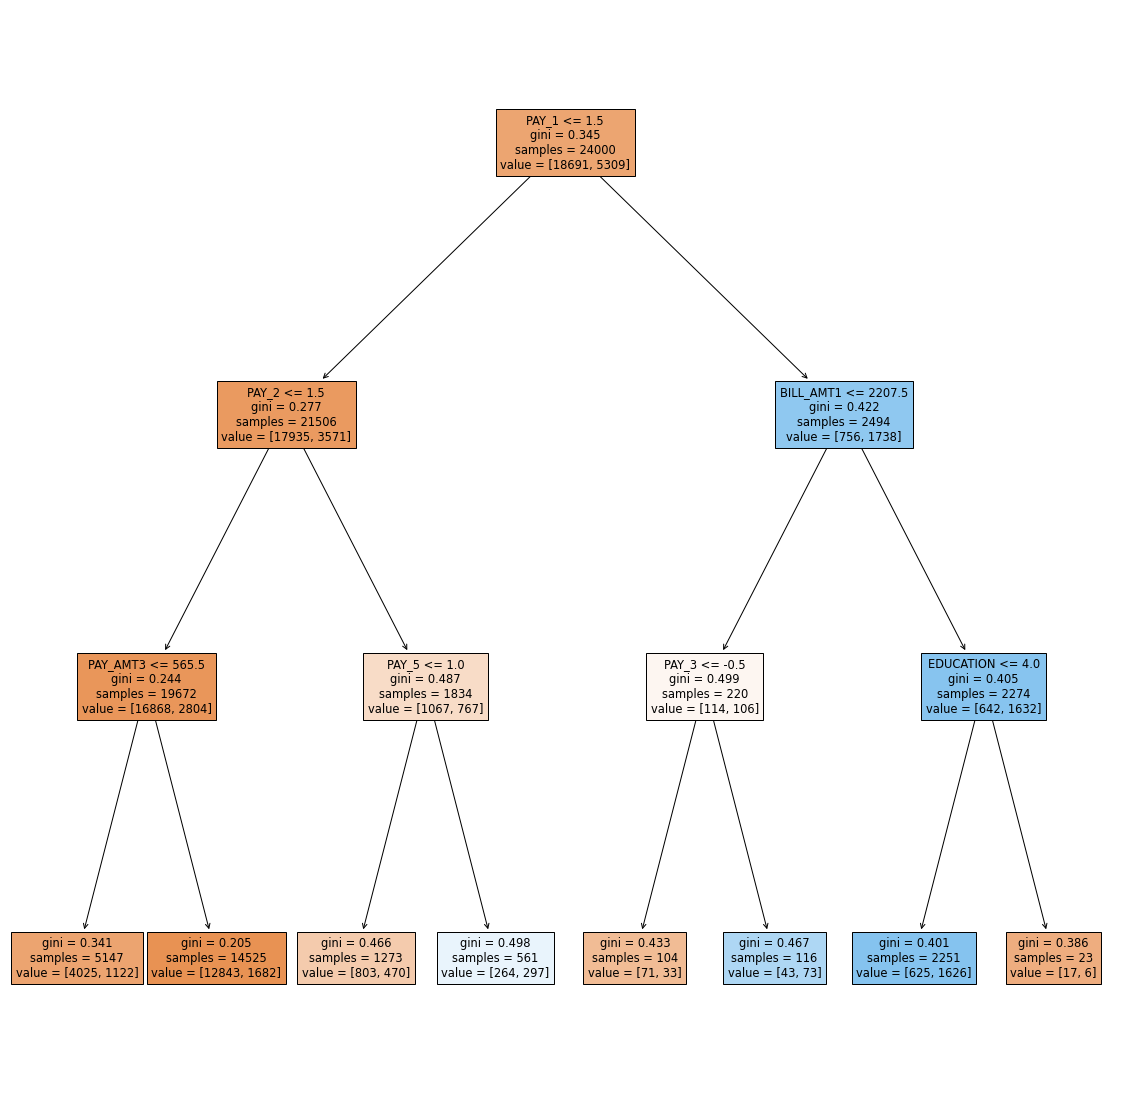

In [95]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(final_model,feature_names=df.columns, filled=True)
plt.show()

ROC_AUC:  0.7285239114340087


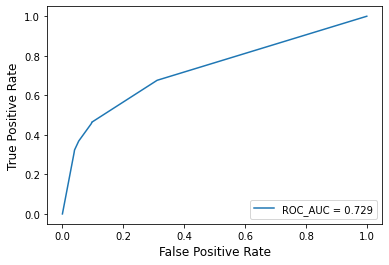

In [96]:
rf_pred_proba = grid.predict_proba(X_base_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Logistic Regression (les méthodes non ensemblistes) 


In [97]:
#Créer une instance instancier logreg de la classe LogisticRegression en fixant à zéro random_state
log=LogisticRegression(random_state=0)
param_grid ={'penalty' : ['l1', 'l2'],
             'C' : np.linspace(-4, 4, 10),
             'solver' : ['lbfgs','newton-cg','liblinear'],
             
             }

In [98]:
from sklearn.model_selection import GridSearchCV
#Créer une instance de recherche par grille appliquée sur l'algorithme de classification par regression logistique
grid=GridSearchCV(log,param_grid,cv=5)

In [99]:
grid.fit(X_base_train,Y_train)

C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-1.3333333333333335)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\User

C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.44444444444444464)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\houss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Use

C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\houss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
        0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']})

In [100]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.44444444444444464, 'penalty': 'l1', 'solver': 'liblinear'}
0.81125


In [101]:
modele_final=grid.best_estimator_
modele_final.fit(X_base_train,Y_train)

LogisticRegression(C=0.44444444444444464, penalty='l1', random_state=0,
                   solver='liblinear')

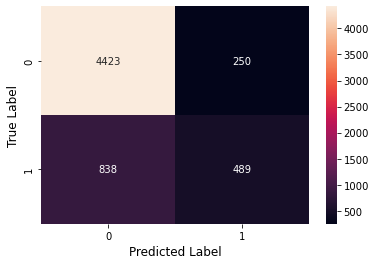

In [102]:
y_pred=modele_final.predict(X_base_test)

y_pred=final_model.predict(X_base_test)
rf_confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [103]:
print(metrics.classification_report(Y_test,y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [104]:
# courbe roc et auc
from sklearn.metrics import roc_curve, auc
y_score=modele_final.predict_proba(X_base_test)
print(y_score)
fpr,tpr,theshold=roc_curve(Y_test,y_score[:,1])
roc_auc=auc(fpr,tpr)

[[0.88965639 0.11034361]
 [0.88306956 0.11693044]
 [0.78075889 0.21924111]
 ...
 [0.84471184 0.15528816]
 [0.88134677 0.11865323]
 [0.95754279 0.04245721]]


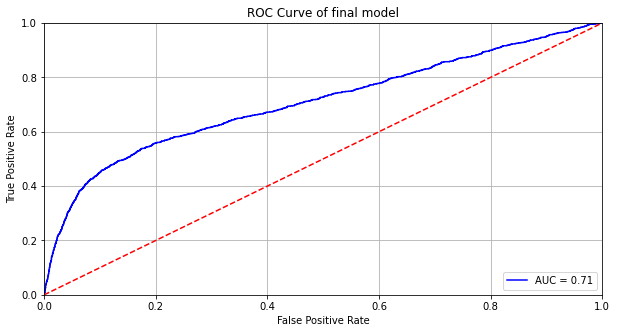

In [105]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## SVM (les méthodes non ensemblistes) 


In [106]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_base_train, Y_train)

SVC()

In [107]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_base_test)
print(classification_report(y_pred_svc_1, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000



C:\Users\houss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\houss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\houss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


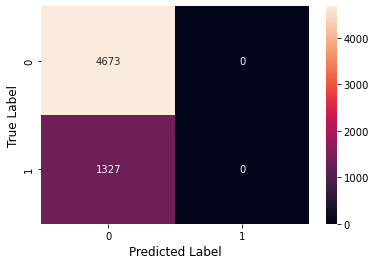

In [108]:


y_pred=svm.predict(X_base_test)
rf_confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

## RANDOM FOREST

In [109]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_base_train, Y_train)
pred_rf = rf_model.predict(X_base_test)

print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_rf))

Test Accuracy:  0.8105


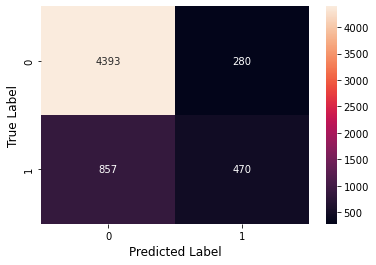

In [110]:
rf_confusion_matrix = metrics.confusion_matrix(Y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [111]:
print(metrics.classification_report(Y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



ROC_AUC:  0.7585600132622252


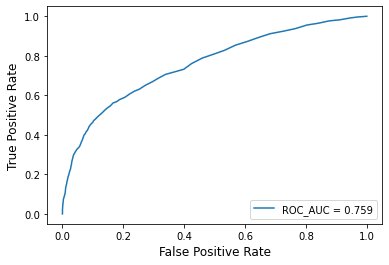

In [112]:
rf_pred_proba = rf_model.predict_proba(X_base_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(Y_test, rf_pred_proba)
print('ROC_AUC: ', rf_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, rf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

### CATBOOST

In [113]:
categorical_ft_base = ['SEX', 'EDUCATION', 'MARRIAGE']

cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_base)
cat_model.fit(X_base_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_base_test,Y_test)], cat_features = categorical_ft_base)
pred_cat = cat_model.predict(X_base_test)

Learning rate set to 0.069474
0:	test: 0.7521430	best: 0.7521430 (0)	total: 220ms	remaining: 3m 39s
1:	test: 0.7574065	best: 0.7574065 (1)	total: 259ms	remaining: 2m 9s
2:	test: 0.7600818	best: 0.7600818 (2)	total: 294ms	remaining: 1m 37s
3:	test: 0.7615838	best: 0.7615838 (3)	total: 332ms	remaining: 1m 22s
4:	test: 0.7649187	best: 0.7649187 (4)	total: 370ms	remaining: 1m 13s
5:	test: 0.7632905	best: 0.7649187 (4)	total: 411ms	remaining: 1m 8s
6:	test: 0.7637895	best: 0.7649187 (4)	total: 455ms	remaining: 1m 4s
7:	test: 0.7631296	best: 0.7649187 (4)	total: 499ms	remaining: 1m 1s
8:	test: 0.7641197	best: 0.7649187 (4)	total: 548ms	remaining: 1m
9:	test: 0.7640774	best: 0.7649187 (4)	total: 591ms	remaining: 58.5s
10:	test: 0.7659763	best: 0.7659763 (10)	total: 629ms	remaining: 56.6s
11:	test: 0.7658850	best: 0.7659763 (10)	total: 675ms	remaining: 55.6s
12:	test: 0.7653735	best: 0.7659763 (10)	total: 714ms	remaining: 54.2s
13:	test: 0.7650978	best: 0.7659763 (10)	total: 760ms	remaining: 5

116:	test: 0.7792630	best: 0.7793492 (112)	total: 5.95s	remaining: 44.9s
117:	test: 0.7791599	best: 0.7793492 (112)	total: 6s	remaining: 44.9s
118:	test: 0.7792168	best: 0.7793492 (112)	total: 6.05s	remaining: 44.8s
119:	test: 0.7792602	best: 0.7793492 (112)	total: 6.1s	remaining: 44.8s
120:	test: 0.7793617	best: 0.7793617 (120)	total: 6.17s	remaining: 44.8s
121:	test: 0.7793575	best: 0.7793617 (120)	total: 6.23s	remaining: 44.8s
122:	test: 0.7794200	best: 0.7794200 (122)	total: 6.28s	remaining: 44.8s
123:	test: 0.7793910	best: 0.7794200 (122)	total: 6.33s	remaining: 44.7s
124:	test: 0.7791939	best: 0.7794200 (122)	total: 6.38s	remaining: 44.7s
125:	test: 0.7792327	best: 0.7794200 (122)	total: 6.43s	remaining: 44.6s
126:	test: 0.7794802	best: 0.7794802 (126)	total: 6.48s	remaining: 44.6s
127:	test: 0.7793649	best: 0.7794802 (126)	total: 6.54s	remaining: 44.5s
128:	test: 0.7795279	best: 0.7795279 (128)	total: 6.59s	remaining: 44.5s
129:	test: 0.7796694	best: 0.7796694 (129)	total: 6.64s

231:	test: 0.7796858	best: 0.7809770 (170)	total: 12.2s	remaining: 40.3s
232:	test: 0.7796539	best: 0.7809770 (170)	total: 12.3s	remaining: 40.4s
233:	test: 0.7794813	best: 0.7809770 (170)	total: 12.3s	remaining: 40.3s
234:	test: 0.7795424	best: 0.7809770 (170)	total: 12.4s	remaining: 40.3s
235:	test: 0.7796211	best: 0.7809770 (170)	total: 12.4s	remaining: 40.3s
236:	test: 0.7795470	best: 0.7809770 (170)	total: 12.5s	remaining: 40.2s
237:	test: 0.7795619	best: 0.7809770 (170)	total: 12.6s	remaining: 40.2s
238:	test: 0.7795571	best: 0.7809770 (170)	total: 12.6s	remaining: 40.1s
239:	test: 0.7795452	best: 0.7809770 (170)	total: 12.7s	remaining: 40.1s
240:	test: 0.7796964	best: 0.7809770 (170)	total: 12.7s	remaining: 40s
241:	test: 0.7796234	best: 0.7809770 (170)	total: 12.8s	remaining: 39.9s
242:	test: 0.7795919	best: 0.7809770 (170)	total: 12.8s	remaining: 39.9s
243:	test: 0.7795316	best: 0.7809770 (170)	total: 12.8s	remaining: 39.8s
244:	test: 0.7795757	best: 0.7809770 (170)	total: 12.

In [114]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat))

Test Accuracy:  0.8181666666666667


In [ ]:

cat_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_cat, labels = [0, 1]))

In [ ]:
cat_pred_proba = cat_model.predict_proba(X_base_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(Y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(Y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Catboost (with Added Features

In [ ]:
X_new = X.copy().drop(pay_x_new, axis = 1)
X_new = X_new.drop(bill_amtx_bins, axis = 1)
X_new = X_new.drop(['AgeBin', 'LimitBin'], axis = 1)

X_new.head()

In [ ]:
X_new.info()

In [ ]:
le = LabelEncoder()

for col in pay_amtx_bins:
    X_new[col] = le.fit_transform(X_new[col])

In [ ]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

In [ ]:
categorical_ft_new = ['SEX', 'EDUCATION', 'MARRIAGE'
                      , 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

print(categorical_ft_new)

cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC',cat_features=categorical_ft_new)
cat_model_new.fit(X_new_train, Y_train, early_stopping_rounds = 100, eval_set = [(X_new_test,Y_test)], cat_features = categorical_ft_new)
pred_cat_new = cat_model_new.predict(X_new_test)

In [ ]:
print("Test Accuracy: ",metrics.accuracy_score(Y_test, pred_cat_new))

In [ ]:
cat_new_confusion_matrix = metrics.confusion_matrix(Y_test, pred_cat_new)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_cat_new, labels = [0, 1]))

In [ ]:
cat_new_pred_proba = cat_model_new.predict_proba(X_new_test)[:,1]

cat_new_roc_auc = metrics.roc_auc_score(Y_test, cat_new_pred_proba)
print('ROC_AUC: ', cat_new_roc_auc)

cat_new_fpr, cat_new_tpr, thresholds = metrics.roc_curve(Y_test, cat_new_pred_proba)

plt.plot(cat_new_fpr,cat_new_tpr, label = 'ROC_AUC = %0.3f' % cat_new_roc_auc)
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [ ]:
pool = Pool(X_new_train, Y_train, cat_features=categorical_ft_new)

Feature_importance = pd.DataFrame({'feature_importance': cat_model_new.get_feature_importance(pool), 
                      'feature_names': X_new_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Feature_importance

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x=Feature_importance['feature_importance'], y=Feature_importance['feature_names'], palette = 'rocket')

plt.show()

##  XGBOOST

In [ ]:
turnover = xgb.DMatrix(data=X_base,label=Y)

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [200],
'subsample': [0.3, 0.5, 0.9],"max_depth":[2,3,4,5],'colsample_bytree':[0.1,0.3,.0,8,0.9,0.15]}

gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(X_base, Y)
print("Best parameters found: ",grid_mse.best_params_)
print("best accuracy found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [ ]:
X_new_train.head()

In [ ]:
reg_xgb = xgb.XGBClassifier(colsample_bytree= 1, learning_rate= 0.04, max_depth=5, n_estimators=200, subsample= 0.5,gamma=0.5)
reg_xgb.fit(X_new_train, Y_train)

pred_xgb = reg_xgb.predict(X_new_test)
print('xgb_accuracy: {:.3f}'.format(metrics.accuracy_score(Y_test, pred_xgb)))

In [ ]:
xgb.plot_importance(reg_xgb)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
X=df[['PAY_1','LIMIT_BAL','BILL_AMT1','PAY_AMT6','PAY_AMT2','PAY_AMT1','AGE','PAY_AMT3','PAY_AMT5','PAY_AMT4','BILL_AMT6','PAY_3','PAY_6']]
Y=df['Default']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42
                                                    , stratify = Y)

In [ ]:
reg_xgb = xgb.XGBClassifier(colsample_bytree= 1, learning_rate= 0.04, max_depth=5, n_estimators=200, subsample= 0.5)
reg_xgb.fit(X_train, Y_train)

pred_xgb = reg_xgb.predict(X_test)
print('xgb_accuracy: {:.3f}'.format(metrics.accuracy_score(Y_test, pred_xgb)))

In [ ]:
X.info()

In [ ]:
cat_new_confusion_matrix = metrics.confusion_matrix(Y_test, pred_xgb)
sns.heatmap(cat_new_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_xgb, labels = [0, 1]))

### Voiting

In [ ]:
for i in range(2,30):
    classifierr = KNeighborsClassifier(n_neighbors=i)
    classifierr.fit(X_new_train, Y_train)
    print(i)
    print ('accuracy = { :.3f}',format(classifierr.score(X_new_test,Y_test)))

In [ ]:
classifierr = KNeighborsClassifier(n_neighbors=18)
classifierr.fit(X_new_train, Y_train)
print ('accuracy = { :.3f}',format(classifierr.score(X_new_test,Y_test)))

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_new_train,Y_train)
y_pred=logreg.predict(X_new_test)
print ('accuracy = { :.2f}',format(logreg.score(X_new_test,Y_test)))

In [ ]:
clf_voting = VotingClassifier(estimators=[('dt',rf_model),('lg',logreg),('knn',classifierr)])

In [ ]:
clf_voting.fit(X_new_train,Y_train)
y_pred=clf_voting.predict(X_new_test)
acc = accuracy_score(Y_test,y_pred)
print("accuracy = { :2.f}  ",format(acc))

### Feature Engineering

-2: No consumption; -1: Paid in full; 0: Revolving credit usage; 1 = one month of payment delay; 2 = two months of payment delay; . . .; 8 = eight months of payment delay; 9 = payment delay of nine months or more.

In [ ]:
payment_data=['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[payment_data]
print(df["PAY_1"].value_counts())
print( len(df[(df["PAY_1"]>=1) & (df["Default"]==1)]) )   #nice for new feature
print( len(df[(df["PAY_1"]>=1) & (df["Default"]==0)]) )

0 and 2 values is significant for understanding payment flow. But 0 is not important for us because of that every people can payment regular for a month in 6 month.

In [ ]:
def investing_pay_1():
    for j in range(1,6):
        print("Payment_"+str(j))
        for i in range(-2,8,1):
            pay_contains = len(df[(df["PAY_"+str(j)]==i) & (df["Default"]==1)])
            print(str(i)+"_quantity: ", pay_contains)
            
investing_pay_1()
df["payment_1_eng"]=[1 if i<0 else 0 if i==0 else 2 for i in df["PAY_1"]]

In [ ]:
X_new.info()

In [ ]:
X_new['somme_pay']=X_new['PAY_1']+X_new['PAY_2']+X_new['PAY_3']+X_new['PAY_4']+X_new['PAY_5']+X_new['PAY_6']

In [ ]:
X_new.head()

In [ ]:
X_new['somme_pay'].value_counts()

In [ ]:
Y.groupby(X_new['somme_pay']).value_counts(normalize = True)


In [ ]:
df['somme_pay']=X_new['PAY_1']+X_new['PAY_2']+X_new['PAY_3']+X_new['PAY_4']+X_new['PAY_5']+X_new['PAY_6']

In [ ]:
plt.figure(figsize=(36,15))
ax = sns.countplot(data = df, x = 'somme_pay', hue="Default", palette = 'rocket',)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,11000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [ ]:
for col in pay_amtx_bins:
    df[col] = le.fit_transform(df[col])

In [ ]:
df=df[df.somme_pay <14]

In [ ]:
plt.style.use("ggplot")
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0,0].boxplot(df["AGE"])
axs[0,0].set_title("Age outliers", color="#14B0B3", size=20)
axs[0,0].set_ylabel("Age", color="#36EA15", size = 15)

axs[0,1].boxplot(df["LIMIT_BAL"])
axs[0,1].set_title("Limit Amount", color="#14B0B3", size=20)
axs[0,1].set_ylabel("credit_limit", color="#258912", size = 15)

axs[0,2].boxplot(df["PAY_1"])
axs[0,2].set_title("PAY 1", color="#14B0B3", size=20)
axs[0,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

axs[1,0].boxplot(df["PAY_AMT1"])
axs[1,0].set_title("PAY Amount 1", color="#14B0B3", size=20)
axs[1,0].set_ylabel("Pay_1 Amount", color="#36EA15", size = 15)

axs[1,1].boxplot(df["PAY_AMT2"])
axs[1,1].set_title("PAY Amount 2", color="#14B0B3", size=20)
axs[1,1].set_ylabel("Pay_1 Amount", color="#258912", size = 15)

axs[1,2].boxplot(df["BILL_AMT1"])
axs[1,2].set_title("Bill Amount 1", color="#14B0B3", size=20)
axs[1,2].set_ylabel("Pay_1 Amount", color="#16560A", size = 15)

In [ ]:
df.shape

In [ ]:
outlier_columns=["AGE","LIMIT_BAL", "PAY_1", "PAY_2","PAY_3","PAY_4","PAY_5","PAY_6", "PAY_AMT1", "PAY_AMT2","BILL_AMT1","BILL_AMT2"]
age_outlier = []
limitbal_outlier = []
pay1_outlier = []
pay2_outlier = []
pay3_outlier = []
pay4_outlier = []
pay5_outlier = []
pay6_outlier = []
payamt1_outlier = []
payamt2_outlier = []
billamt_outlier = []
billamt2_outlier = []

outliers_array=[age_outlier,limitbal_outlier,pay1_outlier,pay2_outlier,pay3_outlier, pay4_outlier, pay5_outlier, pay6_outlier,payamt1_outlier,payamt2_outlier,billamt_outlier,billamt2_outlier]

def outlier_detect(data):
    for i, column in enumerate(outlier_columns):
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3- Q1
        outlier_step = IQR*1.5

        outlier_values = data[(data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)]
        print("*****", column, "******")
        print(outlier_values)
        
        outlier_values_and_1 = data[((data[column]<Q1-outlier_step) | (data[column] >Q3+outlier_step)) & (data["Default"]==1)]
        print("1 ratio is: %",((len(outlier_values_and_1)/len(outlier_values))*100))
        
        outliers_array[i].append(outlier_values_and_1.index)

outlier_detect = outlier_detect(df)

In [ ]:
df.shape

In [ ]:
df["dangeroues_cust"]=0

for i in pay1_outlier:
    df["dangeroues_cust"].loc[i]=1

print(df["dangeroues_cust"].value_counts())

In [ ]:
df["education_level"]=[0 if i == 0 or i==4 or i==5 else 1 if i ==6 or i==1 else 2  for i in df["EDUCATION"]]

In [ ]:
limit_mean = df["LIMIT_BAL"].mean()
limit_std = df["LIMIT_BAL"].std()
print("Credit limit mean: {:.2f} and standart deviation: {:.2f}".format(limit_mean, limit_std))

Q1= df["LIMIT_BAL"].quantile(.20) 
Q2= df["LIMIT_BAL"].quantile(.40) 
Q3= df["LIMIT_BAL"].quantile(.60) 
Q4= df["LIMIT_BAL"].quantile(.80) 
df["limit_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["LIMIT_BAL"]]

In [ ]:
df["dangeroues_cust2"]=0

for i in payamt2_outlier:
    df["dangeroues_cust2"].loc[i]=1

print(df["dangeroues_cust2"].value_counts())

In [ ]:
df["total_payment"]=df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"]

df["repay_cust"]=1
repay_cust = df[(df["total_payment"]>df["LIMIT_BAL"]) & (df["Default"]==0)].index
for i in repay_cust:
    df["repay_cust"].loc[i]=0

In [ ]:
df["pays_means"]=0
def mean_grades(data, column):
    for i in range(1,7):
        data[column] += data["PAY_"+str(i)]
    data[column]=data[column]/i

mean_grades(df, "pays_means")


pay_mean = df["pays_means"].mean()
pay_std = df["pays_means"].std()
pay_min = df["pays_means"].min()
pay_max = df["pays_means"].max()
print("for grades:\n pay mean:{:.2f}\n pay standart dev.:{:.2f}\n pay min: {}\n pay max: {}".format(pay_mean,pay_std,pay_min, pay_max))
df["pays_means"]=[0 if i<(pay_mean-pay_std) else 2 if i>(pay_mean+pay_std) else 1 for i in df["pays_means"] ]

In [ ]:
Q1= df["AGE"].quantile(.20) 
Q2= df["AGE"].quantile(.40) 
Q3= df["AGE"].quantile(.60) 
Q4= df["AGE"].quantile(.80) 
df["AGE_class"] = [0 if i<Q1 else 1 if i>=Q1 and i<Q2 else 2 if i>=Q2 and i<Q3 else 4 if i>=Q3 and i<Q4 else 5 for i in df["AGE"]]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  float64 
 2   SEX            30000 non-null  int64   
 3   EDUCATION      30000 non-null  int64   
 4   MARRIAGE       30000 non-null  int64   
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  int64   
 7   PAY_2          30000 non-null  int64   
 8   PAY_3          30000 non-null  int64   
 9   PAY_4          30000 non-null  int64   
 10  PAY_5          30000 non-null  int64   
 11  PAY_6          30000 non-null  int64   
 12  BILL_AMT1      30000 non-null  float64 
 13  BILL_AMT2      30000 non-null  float64 
 14  BILL_AMT3      30000 non-null  float64 
 15  BILL_AMT4      30000 non-null  float64 
 16  BILL_AMT5      30000 non-null  float64 
 17  BILL_AMT6      30000 non-null  

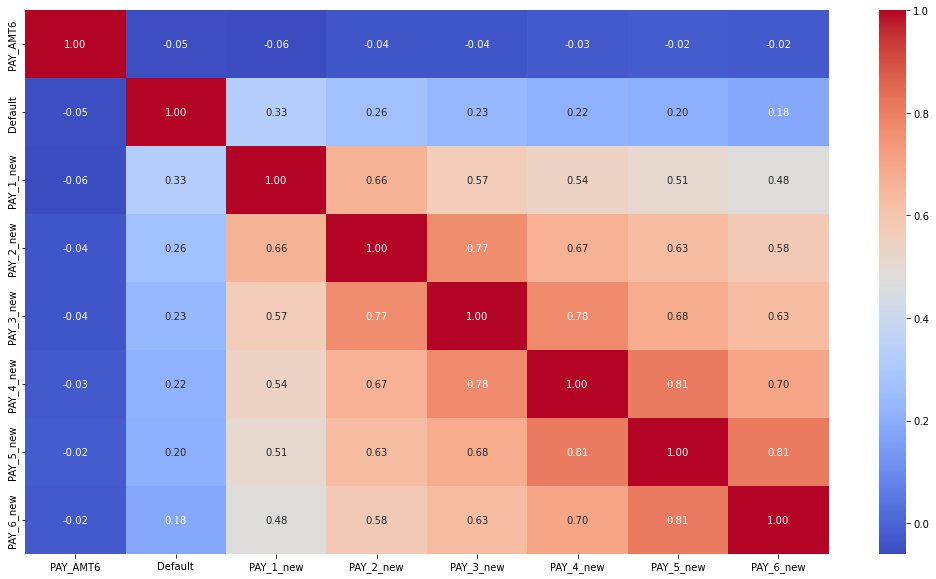

In [125]:
data2=pd.DataFrame(df.iloc[:,23:])
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

In [126]:
data2['MARRIAGE'] =df['MARRIAGE']
data2['PAY_1'] =df['PAY_1']
data2

PAY_AMT6  Default    AgeBin          LimitBin  PAY_1_new  PAY_2_new  \
0           0.0        1  (20, 25]     (5000, 50000]          2          2   
1        2000.0        1  (25, 30]  (100000, 150000]         -1          2   
2        5000.0        0  (30, 35]   (50000, 100000]          0          0   
3        1000.0        0  (35, 40]     (5000, 50000]          0          0   
4         679.0        0  (50, 60]     (5000, 50000]         -1          0   
...         ...      ...       ...               ...        ...        ...   
29995    1000.0        0  (35, 40]  (200000, 300000]          0          0   
29996       0.0        0  (40, 50]  (100000, 150000]         -1         -1   
29997    3100.0        1  (35, 40]     (5000, 50000]          4          3   
29998    1804.0        1  (40, 50]   (50000, 100000]          1         -1   
29999    1000.0        1  (40, 50]     (5000, 50000]          0          0   

       PAY_3_new  PAY_4_new  PAY_5_new  PAY_6_new  ...   BILL_AMT5_bin  \
0             -1         -1         -2         -2  ...         (-1, 0]   
1              0          0          0          2  ...      (0, 25000]   
2              0          0          0          0  ...      (0, 25000]   
3              0          0          0          0  ...  (25000, 75000]   
4             -1          0          0          0  ...      (0, 25000]   
...          ...        ...        ...        ...  ...             ...   
29995          0          0          0          0  ...  (25000, 75000]   
29996         -1         -1          0          0  ...      (0, 25000]   
29997          2         -1          0          0  ...      (0, 25000]   
29998          0          0          0         -1  ...      (0, 25000]   
29999          0          0          0          0  ...  (25000, 75000]   

        BILL_AMT6_bin     PAY_AMT1_bin    PAY_AMT2_bin PAY_AMT3_bin  \
0             (-1, 0]          (-1, 0]      (0, 25000]      (-1, 0]   
1          (0, 25000]          (-1, 0]      (0, 25000]   (0, 25000]   
2          (0, 25000]       (0, 25000]      (0, 25000]   (0, 25000]   
3      (25000, 75000]       (0, 25000]      (0, 25000]   (0, 25000]   
4          (0, 25000]       (0, 25000]  (25000, 50000]   (0, 25000]   
...               ...              ...             ...          ...   
29995      (0, 25000]       (0, 25000]      (0, 25000]   (0, 25000]   
29996         (-1, 0]       (0, 25000]      (0, 25000]   (0, 25000]   
29997      (0, 25000]          (-1, 0]         (-1, 0]   (0, 25000]   
29998  (25000, 75000]  (50000, 100000]      (0, 25000]   (0, 25000]   
29999      (0, 25000]       (0, 25000]      (0, 25000]   (0, 25000]   

      PAY_AMT4_bin     PAY_AMT5_bin PAY_AMT6_bin MARRIAGE PAY_1  
0          (-1, 0]          (-1, 0]      (-1, 0]        1     2  
1       (0, 25000]          (-1, 0]   (0, 25000]        2    -1  
2       (0, 25000]       (0, 25000]   (0, 25000]        2     0  
3       (0, 25000]       (0, 25000]   (0, 25000]        1     0  
4       (0, 25000]       (0, 25000]   (0, 25000]        1    -1  
...            ...              ...          ...      ...   ...  
29995   (0, 25000]       (0, 25000]   (0, 25000]        1     0  
29996   (0, 25000]          (-1, 0]      (-1, 0]        2    -1  
29997   (0, 25000]       (0, 25000]   (0, 25000]        2     4  
29998   (0, 25000]  (50000, 100000]   (0, 25000]        1     1  
29999   (0, 25000]       (0, 25000]   (0, 25000]        1     0  

[30000 rows x 24 columns]

In [127]:
data2=data2.drop(["AgeBin","LimitBin","BILL_AMT1_bin","BILL_AMT2_bin","BILL_AMT3_bin","BILL_AMT4_bin","BILL_AMT5_bin","BILL_AMT6_bin","PAY_1_new","PAY_2_new","PAY_3_new","PAY_4_new","PAY_5_new","PAY_6_new"],axis=1);

In [128]:
data2.columns

Index(['PAY_AMT6', 'Default', 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin',
       'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin', 'MARRIAGE', 'PAY_1'],
      dtype='object')

In [130]:
X_2=data2.drop(columns=['Default'],axis=1)
y_2=data2['Default']

#scaled = (x - xmin) / (xmax - xmin)  for logistic regression
 
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_2,y_2,test_size=0.35,random_state=0)

In [131]:
reg_xgb.fit(X_train_2, y_train_2)
y_pred_xgb =reg_xgb.predict(X_test_2)
score_xgb_2=accuracy_score(y_pred_xgb,y_test_2)*100
print("Xgboost SCORE:{:.3f}".format(score_xgb_2))

rf_model.fit(X_train_2, y_train_2)
y_pred_rfc = rf_model.predict(X_test_2)
score_rfc_2=accuracy_score(y_pred_rfc,y_test_2)*100
print("RandomForestClassifier SCORE:{:.3f}".format(score_rfc_2))

log_reg = LogisticRegression(n_jobs=-1,solver='liblinear')
log_reg.fit(X_train_2, y_train_2)
y_pred_log_2 = log_reg.predict(X_test_2)
score_log_2=accuracy_score(y_pred_log_2,y_test_2)*100
print("Logistic Regression SCORE:{:.3f}".format(score_log_2))

NameError: name 'reg_xgb' is not defined

In [ ]:
cat_model_new = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model_new.fit(X_train_2, y_train_2, early_stopping_rounds = 100, eval_set = [(X_test_2,y_test_2)])
pred_cat_new = cat_model_new.predict(X_test_2)

In [ ]:
print("Test Accuracy: ",metrics.accuracy_score(y_test_2, pred_cat_new))

In [ ]:
import pickle
pickle.dump(cat_model_new, open('data.pkl', 'wb'))